In [1]:
import pandas as pd
import micom
from gurobipy import *
import numpy as np
from micom import load_pickle
from micom.media import minimal_medium
import random
from micom.workflows import workflow

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import cobra
# https://resendislab.github.io/micom/media.html

In [2]:
#Number of samples

In [3]:
n = 254

In [ ]:
#Get random values for the abundances

In [4]:
x = [0]*n
y = [0]*n
z = [0]*n

In [5]:
for i in range(n):
    x[i] = random.random()
    y[i] = random.uniform(0, 1.0-x[i])
    z[i] = 1.0-x[i]-y[i]
    #print(x[i],y[i],z[i],x[i]+y[i]+z[i])


In [6]:
for i in range(n):
    x[i] = random.random()
    y[i] = random.random()
    z[i] = random.random()
    temp  = x[i]+y[i]+z[i]
    x[i] = x[i]/temp
    y[i] = y[i]/temp
    z[i] = z[i]/temp

In [ ]:
#Define each community with abundances (random numbers)

In [7]:
d = [0]*(n+2)
df = [0]*(n+2)
nm=(n+2)/2

In [8]:
for i in range(int(nm)):
    d[i] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May16_div50_NormalObj.xml', '../SBMLS/cobraB_May16_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[x[i], y[i], z[i]]
    }
    df[i]=pd.DataFrame(data=d[i])

In [9]:
for i in range(int(nm), n):
    d[i] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May12_div50_NormalObj.xml', '../SBMLS/cobraB_May12_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[x[i], y[i], z[i]]
    }
    df[i]=pd.DataFrame(data=d[i])

In [10]:
#Load same reconstruccion but with abundances of day 6
d[n] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May12_div50_NormalObj.xml', '../SBMLS/cobraB_May12_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[0.08955224, 0.3880597, 0.5149254]
    }
df[n] = pd.DataFrame(data=d[n])

In [11]:
#Load same reconstruccion but with abundances of day 6
d[n+1] = {'id': ['A', 'B', 'C'], 
     'file': ['../SBMLS/cobraA_May12_div50_NormalObj.xml', '../SBMLS/cobraB_May12_div50_NormalObj.xml','../SBMLS/cobraC_May12_div50_NormalObj.xml'],
     'abundance':[0.573913, 0.273913, 0.1521739]
    }
df[n+1] = pd.DataFrame(data=d[n+1])

In [ ]:
#Make array to store communities

In [5]:
com = [0]*(n+2)

In [ ]:
#Create new communities and save them as pickle

In [13]:
for i in range(len(com)):
    com[i] = micom.Community(df[i],solver="gurobi")
    print(i)

Academic license - for non-commercial use only - expires 2021-05-16
Using license file C:\Users\santi\gurobi\gurobi.lic



0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127



128



129



130



131



132



133



134



135



136



137



138



139



140



141



142



143



144



145



146



147



148



149



150



151



152



153



154



155



156



157



158



159



160



161



162



163



164



165



166



167



168



169



170



171



172



173



174



175



176



177



178



179



180



181



182



183



184



185



186



187



188



189



190



191



192



193



194



195



196



197



198



199



200



201



202



203



204



205



206



207



208



209



210



211



212



213



214



215



216



217



218



219



220



221



222



223



224



225



226



227



228



229



230



231



232



233



234



235



236



237



238



239



240



241



242



243



244



245



246



247



248



249



250



251



252



253



254



255


In [14]:
for i in range(len(com)):
    com[i].to_pickle("./models/community_scan_May16_"+str(i)+".pickle")    

In [ ]:
#Load communities previosly made

In [6]:
for i in range(len(com)):
    com[i]=load_pickle("./models/community_scan_May16_"+str(i)+".pickle")
    print(i) 

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpmsnb3d27.lp
Reading time = 0.15 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
0
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpt_kp2fxt.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
1
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpibsf_i5j.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
2
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpmrdowv9b.lp
Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
3
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpexjy0jny.lp
Reading time = 0.19 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
4
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp_fs5ljcn.lp
Reading time = 0.17 seconds
: 3200 rows,

52
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmplv7_drbs.lp
Reading time = 0.10 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
53
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpfkbf1_1e.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
54
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpmm0e9osi.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
55
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpy53wzwpj.lp
Reading time = 0.13 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
56
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmppla6r7lp.lp
Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
57
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpg5uek0fu.lp
Reading time = 0.11 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
58
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpv7fedf_k.lp

Reading time = 0.12 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
106
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpdbi6go_0.lp
Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
107
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpj02_0kye.lp
Reading time = 0.16 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
108
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp83mum1nb.lp
Reading time = 0.19 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
109
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp48evxak3.lp
Reading time = 0.18 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
110
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpjfiy_cqu.lp
Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
111
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpi506pinb.lp
Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
112
Re

159
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpmwvkwseq.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
160
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpaj3zb1b_.lp
Reading time = 0.14 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
161
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpzv2qpwl6.lp
Reading time = 0.16 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
162
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmps7trz9dn.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
163
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpscs48a9i.lp
Reading time = 0.15 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
164
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpfl6imtgs.lp
Reading time = 0.12 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
165
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpocqr

Reading time = 0.19 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
213
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp5s9h52bk.lp
Reading time = 0.13 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
214
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp8oi_kf3p.lp
Reading time = 0.14 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
215
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpjtuhu411.lp
Reading time = 0.16 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
216
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp_g0xvt94.lp
Reading time = 0.17 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
217
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp3b7psuli.lp
Reading time = 0.16 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
218
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmpzfmroicd.lp
Reading time = 0.16 seconds
: 3253 rows, 7945 columns, 31185 nonzeros
219
Re

In [ ]:
#Generate data for some images (based on the codes used to generate figures of the micom paper)

In [7]:
dt = {'sample':[],'run_accession':[],'subset':[],'type':[],'status':[]}
dt_sp = {'samples':[],'name':[],'reads':[],'relative':[],'genus':[]}
for i,c in enumerate(com):
    dt['sample'].append(i)
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],2))+str(round(c.abundances['B'],2))+str(round(c.abundances['C'],2)))
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],2))+str(round(c.abundances['B'],2))+str(round(c.abundances['C'],2)))
    dt_sp['samples'].append('com_'+str(round(c.abundances['A'],2))+str(round(c.abundances['B'],2))+str(round(c.abundances['C'],2)))
    
    dt['run_accession'].append('com_'+str(round(c.abundances['A'],2))+str(round(c.abundances['B'],2))+str(round(c.abundances['C'],2)))
    dt_sp['name'].append('A')
    dt_sp['name'].append('B')
    dt_sp['name'].append('C')
    
    dt['subset'].append('MCF7')
    dt_sp['reads'].append(1)
    dt_sp['reads'].append(1)
    dt_sp['reads'].append(1)
    
    dt['type'].append('spheroid_syn')
    dt_sp['relative'].append(c.abundances['A'])
    dt_sp['relative'].append(c.abundances['B'])
    dt_sp['relative'].append(c.abundances['C'])
    
    dt['status'].append('OK')
    dt_sp['genus'].append('A')
    dt_sp['genus'].append('B')
    dt_sp['genus'].append('C')
dtfm = pd.DataFrame(data=dt)
dtfm_sp = pd.DataFrame(data=dt_sp)
dtfm_sp

,samples,name,reads,relative,genus
0,com_0.180.520.3,A,1,0.184714,A
1,com_0.180.520.3,B,1,0.517573,B
2,com_0.180.520.3,C,1,0.297714,C
3,com_0.320.470.21,A,1,0.320366,A
4,com_0.320.470.21,B,1,0.471315,B
...,...,...,...,...,...
763,com_0.090.390.52,B,1,0.390977,B
764,com_0.090.390.52,C,1,0.518797,C
765,com_0.570.270.15,A,1,0.573913,A
766,com_0.570.270.15,B,1,0.273913,B


In [8]:
dtfm.to_csv("./data/Recent_scan.csv",index=False)
dtfm_sp.to_csv("./data/species_reduc_scan.csv",index=False)

In [ ]:
#Solve for each community so we can compare the reactions' fluxes

In [9]:
sol = [0]*(n+2)

In [10]:
#Obtain optimization with tradeoff=0.5 (day 6)
for i in range(len(sol)):
    sol[i] = com[i].cooperative_tradeoff(fraction=0.5, fluxes=True)
    print(i,end=', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [11]:
for s in sol:
    print(s.growth_rate,'\n', s.members, end='\n\n\n')

0.027889279756151512 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.184714     0.013187       1431         1166
B              0.517573     0.036953        872          713
C              0.297714     0.021254       1462         1193
medium              NaN          NaN        124          124


0.027889279756149677 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.320366     0.024267       1431         1166
B              0.471315     0.035704        872          713
C              0.208320     0.015779       1462         1193
medium              NaN          NaN        124          124


0.027889279756142228 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.839170     0.032612       1431         1166
B           

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.263129     0.021525       1431         1166
B              0.378201     0.030938        872          713
C              0.358669     0.029343       1462         1193
medium              NaN          NaN        124          124


0.027889279756161317 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.433202     0.026646       1431         1166
B              0.054153     0.003330        872          713
C              0.512645     0.031534       1462         1193
medium              NaN          NaN        124          124


0.027884593356498864 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.344394     0.019280       1431         1166
B              0.614645     0.0344

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.276535     0.022739       1431         1166
B              0.339662     0.027931        872          713
C              0.383803     0.031563       1462         1193
medium              NaN          NaN        124          124


0.027889279756153622 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.439557     0.032673       1431         1166
B              0.168507     0.012524        872          713
C              0.391936     0.029131       1462         1193
medium              NaN          NaN        124          124


0.0278892797561631 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.153519     0.010563       1431         1166
B              0.314956     0.021672

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.573728     0.036078       1431         1166
B              0.104730     0.006585        872          713
C              0.321543     0.020218       1462         1193
medium              NaN          NaN        124          124


0.027889279756149195 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.213659     0.013831       1431         1166
B              0.588066     0.038072        872          713
C              0.198275     0.012835       1462         1193
medium              NaN          NaN        124          124


0.02788927975615752 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.288716     0.023917       1431         1166
B              0.368632     0.03054

0.027889279756159433 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.369610     0.028065       1431         1166
B              0.441642     0.033537        872          713
C              0.188748     0.014331       1462         1193
medium              NaN          NaN        124          124


0.027889279756155953 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.437841     0.034898       1431         1166
B              0.291114     0.023201        872          713
C              0.271045     0.021602       1462         1193
medium              NaN          NaN        124          124


0.027889279756138943 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.436320     0.030495       1431         1166
B           

medium              NaN          NaN        126          126


0.027889279756154704 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.312261     0.025759       1512         1217
B              0.388968     0.032090        872          713
C              0.298772     0.024647       1462         1193
medium              NaN          NaN        126          126


0.02788927975644143 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.405918     0.032378       1512         1217
B              0.361954     0.028869        872          713
C              0.232129     0.018514       1462         1193
medium              NaN          NaN        126          126


0.027889279756140736 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A          

0.027889279756161015 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.843314     0.032031       1512         1217
B              0.004790     0.000181        872          713
C              0.151897     0.005768       1462         1193
medium              NaN          NaN        126          126


0.027889279756156245 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.718154     0.036052       1512         1217
B              0.134181     0.006735        872          713
C              0.147666     0.007412       1462         1193
medium              NaN          NaN        126          126


0.027889279756183466 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.247346     0.018185       1512         1217
B           

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.542090     0.033323       1512         1217
B              0.394797     0.024267        872          713
C              0.063113     0.003879       1462         1193
medium              NaN          NaN        126          126


0.027889279756154725 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.155630     0.010424       1512         1217
B              0.555687     0.037224        872          713
C              0.288683     0.019337       1462         1193
medium              NaN          NaN        126          126


0.027888402282482582 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.265642     0.013361       1512         1217
B              0.694468     0.0349

               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.237203     0.016356       1512         1217
B              0.550588     0.037968        872          713
C              0.212208     0.014632       1462         1193
medium              NaN          NaN        126          126


0.027889279756157025 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.300662     0.024126       1512         1217
B              0.429092     0.034434        872          713
C              0.270246     0.021685       1462         1193
medium              NaN          NaN        126          126


0.02788927975616543 
               abundance  growth_rate  reactions  metabolites
compartments                                                
A              0.457537     0.033167       1512         1217
B              0.152339     0.01104

In [ ]:
#Generate some 4D figures related to abundances and fluxes

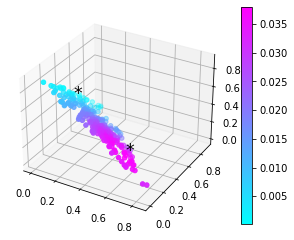

In [14]:
#Abundances and growth rate of A

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].members.growth_rate['A']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

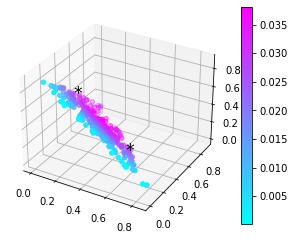

In [15]:
#Abundances and growth rate of B

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].members.growth_rate['B']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

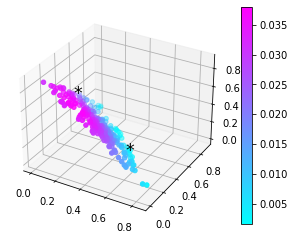

In [16]:
#Abundances and growth rate of C

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].members.growth_rate['C']

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

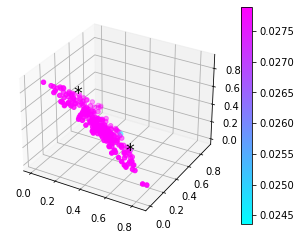

In [17]:
#Abundances and growth rate of the whole community

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].growth_rate

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

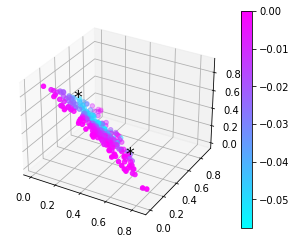

In [18]:
#Abundances and flux of exchange pyruvate

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    c[i] = sol[i].fluxes['EX_pyr_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

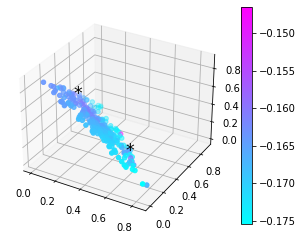

In [19]:
#Abundances and exchange oxygen

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_o2_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

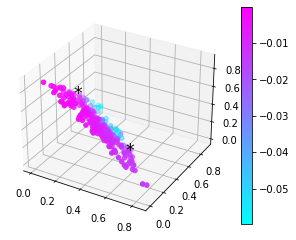

In [20]:
#Abundances and exchange alanine

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_ala_L_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

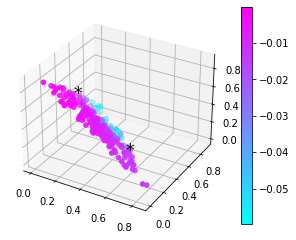

In [26]:
#Abundances and exchange lactate D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = com[i].abundances['A']
    y[i] = com[i].abundances['B']
    z[i] = com[i].abundances['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_lac_D_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(0.08955224, 0.3880597, 0.5149254, "*", color='black', size='xx-large')
ax.text(0.573913, 0.273913, 0.1521739, "*", color='black', size='xx-large')

plt.show()

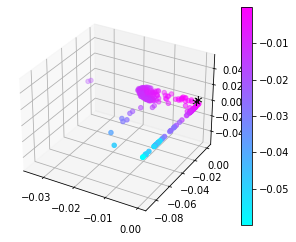

In [21]:
#Individual alanine exchanges and general exchange alanine

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_ala_L_b']['A']
    y[i] = sol[i].fluxes['EX_ala_L_b']['B']
    z[i] = sol[i].fluxes['EX_ala_L_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_ala_L_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_ala_L_b']['A'], sol[126].fluxes['EX_ala_L_b']['B'], sol[126].fluxes['EX_ala_L_b']['C'], "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_ala_L_b']['A'], sol[127].fluxes['EX_ala_L_b']['B'], sol[127].fluxes['EX_ala_L_b']['C'], "*", color='black', size='xx-large')

plt.show()

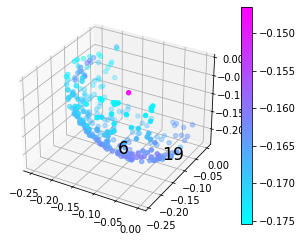

In [22]:
#Individual oxygen exchanges and general exchange oxygen

#%matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_o2_b']['A']
    y[i] = sol[i].fluxes['EX_o2_b']['B']
    z[i] = sol[i].fluxes['EX_o2_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_o2_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_o2_b']['A'], sol[126].fluxes['EX_o2_b']['B'], sol[126].fluxes['EX_o2_b']['C'], "6", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_o2_b']['A'], sol[127].fluxes['EX_o2_b']['B'], sol[127].fluxes['EX_o2_b']['C'], "19", color='black', size='xx-large')

plt.show()

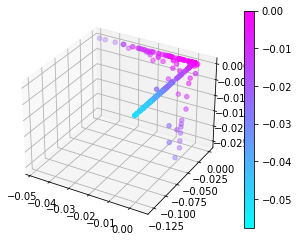

In [23]:
#Individual pyruvate exchanges and general exchange pyruvate

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_pyr_b']['A']
    y[i] = sol[i].fluxes['EX_pyr_b']['B']
    z[i] = sol[i].fluxes['EX_pyr_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_pyr_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)
plt.show()

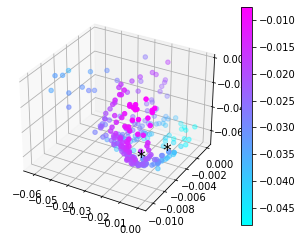

In [30]:
#Individual galactose exchanges and general exchange galactose

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [0]*(n+2)
y = [0]*(n+2)
z = [0]*(n+2)
c = [0]*(n+2)

for i in range(n+2):
    x[i] = sol[i].fluxes['EX_gal_b']['A']
    y[i] = sol[i].fluxes['EX_gal_b']['B']
    z[i] = sol[i].fluxes['EX_gal_b']['C']
    #c[i] = sol[i].growth_rate  #General
    c[i] = sol[i].fluxes['EX_gal_m'].medium

img = ax.scatter(x, y, z, c=c, cmap=plt.cool())
fig.colorbar(img)

ax.text(sol[126].fluxes['EX_gal_b']['A'], sol[126].fluxes['EX_gal_b']['B'], sol[126].fluxes['EX_gal_b']['C'], "*", color='black', size='xx-large')
ax.text(sol[127].fluxes['EX_gal_b']['A'], sol[127].fluxes['EX_gal_b']['B'], sol[127].fluxes['EX_gal_b']['C'], "*", color='black', size='xx-large')

plt.show()

In [24]:
plt.close()

In [25]:
#Obtain mean and other statistics of fluxes

In [26]:
solt = sol.copy()

for s in solt:
    s.fluxes = s.fluxes.fillna(0)

In [28]:
import statistics as st
for r in solt[0].fluxes:
    if 'EX_' in r:
        print(r)
        try:
            print(np.mean([s.fluxes[r]['A'] for s in solt]), np.mean([s.fluxes[r]['B'] for s in solt]), np.mean([s.fluxes[r]['C'] for s in solt]))
            print(st.pvariance([s.fluxes[r]['A'] for s in solt]), st.pvariance([s.fluxes[r]['B'] for s in solt]), st.pvariance([s.fluxes[r]['C'] for s in solt]))
            print(st.pstdev([s.fluxes[r]['A'] for s in solt]), st.pstdev([s.fluxes[r]['B'] for s in solt]), st.pstdev([s.fluxes[r]['C'] for s in solt]), end='\n\n')
        except:
            print('error',end='\n\n\n')

EX_2hb_LPAREN_e_RPAREN_
-4.765961464437572e-05 0.0 1.2447010898817989e-05
5.169786367735657e-08 0.0 4.188550514474567e-09
0.00022737164220138924 0.0 6.471901200168747e-05

EX_2hb_b
-4.765961464437572e-05 0.0 1.2447010898817989e-05
5.169786367735657e-08 0.0 4.188550514474567e-09
0.00022737164220138924 0.0 6.471901200168747e-05

EX_2hb_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_2mcit_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_34hpp_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_3aib_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4abut_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_4mop_

0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_chsterol_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_chsterol_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cit_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cit_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cit_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_citr_L_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_citr_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cl_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cl_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_cl_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_co2_LPAREN_e_RPAREN_
0.07233889548838629 0.10270557136116648 0.12164849766509506
0.0031910510004868465 0.006492730387298465 0.0030256819745541935
0.0564893883883234 0.08057748064626037 0.055006199419285404

EX_co2_b
0.07233889548838629 0.10270557136116648 0.12164849766509506
0.0031910510004868465 0.006492730387298465 0.0030256819745541935
0.0564893883883234 0.08057748064626037 0.055006199419285404

EX_co2_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_creat_

-0.00276221393411881 -0.002973154757085911 -0.016593651610620055
1.9700814092849713e-06 1.8229919223379222e-06 0.00010353319510506821
0.0014035958853191937 0.0013501821811659055 0.01017512629430555

EX_his_L_b
-0.00276221393411881 -0.002973154757085911 -0.016593651610620055
1.9700814092849713e-06 1.8229919223379222e-06 0.00010353319510506821
0.0014035958853191937 0.0013501821811659055 0.01017512629430555

EX_his_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ile_L_LPAREN_e_RPAREN_
-0.0062511997648343545 -0.006728582492739017 -0.008725300983227094
1.0090119375456343e-05 9.336774627784714e-06 1.465984649927207e-05
0.003176494825347012 0.0030556136254089317 0.0038288178984214006

EX_ile_L_b
-0.0062511997648343545 -0.006728582492739017 -0.008725300983227094
1.0090119375456343e-05 9.336774627784714e-06 1.465984649927207e-05
0.003176494825347012 0.0030556136254089317 0.0038288178984214006

EX_ile_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_inost_LPAREN_e_RPAREN_
-0.0016928197784208889 -0.007353

0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pnto_R_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pnto_R_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ppa_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ppa_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ppa_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_pro_L_LPAREN_e_RPAREN_
0.0009212734312088672 -0.0025485951256968764 0.0
2.015377251718982e-05 1.9810301300997798e-05 0.0
0.004489295325236447 0.004450876464360452 0.0

EX_pro_L_b
0.0009212734312088673 -0.0025485951256968764 0.0
2.015377251718982e-05 1.9810301300997798e-05 0.0
0.004489295325236447 0.004450876464360452 0.0

EX_pro_L_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ps_hs_LPAREN_e_RPAREN_
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ps_hs_b
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ps_hs_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_ptrc_LPAREN_e_RPAREN_
0.0 1.1828874471081575e-08 0.0
0.0 2.3432666924447245e-14 0.0
0.0 1.5307732335145935e-07 0.0

EX_ptrc_b
0.0 1.1828874471081575e-08 0.0
0.0 2.343266692444

0.0005380219696480486 0.00047831925887260613 0.0

EX_xmp_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0

EX_xylt_LPAREN_e_RPAREN_
0.0011619230332674474 -0.001852557243261932 0.0
4.182780793422277e-06 7.1673444860391174e-06 0.0
0.002045184782219513 0.002677189661947602 0.0

EX_xylt_b
0.0011619230332674474 -0.001852557243261932 0.0
4.182780793422277e-06 7.1673444860391174e-06 0.0
0.002045184782219513 0.002677189661947602 0.0

EX_xylt_m
0.0 0.0 0.0
0.0 0.0 0.0
0.0 0.0 0.0



In [29]:
#PCA of fluxes by population (A, B and C)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [32]:
A_d = {}
B_d = {}
C_d = {}
m_d = {}
for r in solt[0].fluxes:
    try:
        A_d[r]=[s.fluxes[r]['A'] for s in sol]
    except:
        A_d[r]=[0]*len(sol)
        
    try: 
        B_d[r]=[s.fluxes[r]['B'] for s in sol]
    except:
        B_d[r]=[0]*len(sol)
        
    try:
        C_d[r]=[s.fluxes[r]['C'] for s in sol]
    except:
        C_d[r]=[0]*len(sol)
        
    try:
        m_d[r]=[s.fluxes[r]['medium'] for s in sol]
    except:
        m_d[r]=[0]*len(sol)
                
for r in solt[159].fluxes:
    if r not in A_d:
        try:
            A_d[r]=[s.fluxes[r]['A'] for s in sol]
        except:
            A_d[r]=[0]*len(sol)

        try: 
            B_d[r]=[s.fluxes[r]['B'] for s in sol]
        except:
            B_d[r]=[0]*len(sol)

        try:
            C_d[r]=[s.fluxes[r]['C'] for s in sol]
        except:
            C_d[r]=[0]*len(sol)

        try:
            m_d[r]=[s.fluxes[r]['medium'] for s in sol]
        except:
            m_d[r]=[0]*len(sol)

In [33]:
dfA = pd.DataFrame(data=A_d)
dfB = pd.DataFrame(data=B_d)
dfC = pd.DataFrame(data=C_d)
dfm = pd.DataFrame(data=m_d)

In [34]:
dfA = dfA.loc[:, (dfA != 0).any(axis=0)]
dfB = dfB.loc[:, (dfB != 0).any(axis=0)]
dfC = dfC.loc[:, (dfC != 0).any(axis=0)]
dfm = dfm.loc[:, (dfm != 0).any(axis=0)]

In [35]:
dfA

,2HBO,3DSPHR,3HBCOAHLm,3HCO3_NAt,4MOPt2im,4MOPte,AACOAT,ACACT1r,ACACT1rm,ACACtx,...,r2108,r2109,r2114,r2136,r2406,r2407,r2408,r2410,r2411,xmpt
0,0.0,0.000000,0.000000,-0.018154,0.000000,0.0,0.000000,0.000000,0.001614,0.000000,...,0.0,0.0,0.00000,0.015343,0.0,0.000000,0.0,0.0,0.0,0.000607
1,0.0,0.000424,0.000000,-0.058252,0.000000,0.0,0.000743,-0.000743,0.006614,-0.003644,...,0.0,0.0,0.00000,0.028660,0.0,0.000000,0.0,0.0,0.0,0.001117
2,0.0,0.000570,0.000000,-0.093010,0.004707,0.0,0.006164,-0.006164,0.005548,-0.006263,...,0.0,0.0,0.00010,0.040508,0.0,0.000000,0.0,0.0,0.0,-0.000012
3,0.0,0.000000,0.000000,-0.028648,0.000000,0.0,0.000000,0.000000,0.006483,-0.000153,...,0.0,0.0,0.00436,0.020182,0.0,0.000000,0.0,0.0,0.0,0.000798
4,0.0,0.000000,0.000000,-0.010170,0.000000,0.0,0.000000,0.000000,0.000904,0.000000,...,0.0,0.0,0.00000,0.008596,0.0,0.000000,0.0,0.0,0.0,0.000340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,0.000622,0.000000,-0.110478,0.016566,0.0,0.012210,-0.012210,0.000000,0.000000,...,0.0,0.0,0.00000,0.045152,0.0,0.000000,0.0,0.0,0.0,0.000000
252,0.0,0.000605,0.021205,-0.114739,0.020269,0.0,0.015234,-0.015234,0.000000,0.000000,...,0.0,0.0,0.00000,0.045529,0.0,0.000000,0.0,0.0,0.0,0.000000
253,0.0,0.000488,0.007069,-0.073285,0.008971,0.0,0.008330,-0.008330,0.000000,0.000000,...,0.0,0.0,0.00000,0.038497,0.0,0.013266,0.0,0.0,0.0,0.000000
254,0.0,0.000102,0.000000,-0.007204,0.000000,0.0,0.000000,0.000000,0.000716,0.000000,...,0.0,0.0,0.00000,0.006193,0.0,0.000000,0.0,0.0,0.0,0.000269


In [40]:
dfAT = dfA.transpose()

In [41]:
#PCA for A

In [42]:
scaler = StandardScaler()
scaler.fit(dfA)
pcaA = scaler.transform(dfA)

In [43]:
pca = PCA(n_components=4) # estimate only 2 PCs
pcaA_new = pca.fit_transform(pcaA)

In [44]:
scalerT = StandardScaler()
scalerT.fit(dfAT)
pcaAT = scalerT.transform(dfAT)

In [45]:
pcaT = PCA(n_components=4) # estimate only 2 PCs
pcaAT_new = pcaT.fit_transform(pcaAT)

In [46]:
#for i,c in enumerate(dfA.columns):
#    if "EX_pyr" in c:
#        print(i,c)

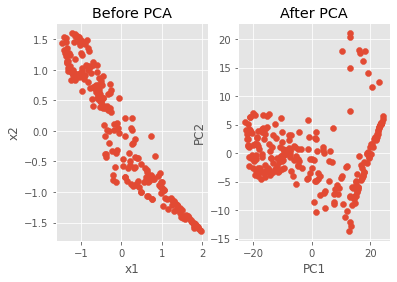

In [47]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaA[:,141], pcaA[:,154])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaA_new[:,0], pcaA_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

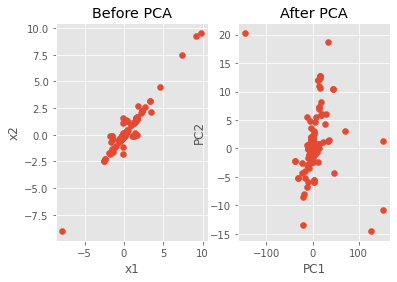

In [48]:
# 10 & 20
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaAT[:,10], pcaAT[:,20])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaAT_new[:,0], pcaAT_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [49]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfA.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,2HBO,3DSPHR,3HBCOAHLm,3HCO3_NAt,4MOPt2im,4MOPte,AACOAT,ACACT1r,ACACT1rm,ACACtx,...,r2108,r2109,r2114,r2136,r2406,r2407,r2408,r2410,r2411,xmpt
PC1,0.013339,-0.061647,-0.009491,0.064323,-0.059643,0.004652,-0.060710,0.060710,0.010673,0.018282,...,-0.004344,-0.013339,0.004018,-0.063738,-0.003659,-0.002104,0.001640,0.003659,-0.003659,0.030642
PC2,0.114609,-0.006782,-0.038420,-0.008855,0.032858,0.004543,0.043873,-0.043873,-0.090706,0.015782,...,0.031063,-0.114609,-0.047029,-0.022548,-0.007244,-0.039581,-0.036926,0.007244,-0.007244,-0.091273
PC3,-0.004332,-0.011414,-0.094092,-0.011885,-0.034852,0.013052,-0.025205,0.025205,0.083079,-0.142760,...,-0.010745,0.004332,0.032884,-0.001723,-0.011047,-0.066020,-0.038776,0.011047,-0.011047,-0.057579
PC4,0.118997,0.033458,0.095148,0.002495,-0.043297,0.003957,-0.030777,0.030777,0.049580,-0.071555,...,0.007209,-0.118997,-0.009436,0.010683,-0.005144,0.091980,0.079470,0.005144,-0.005144,0.023624


In [50]:
pd.DataFrame(
    data    = pcaT.components_,
    columns = dfAT.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
PC1,0.062156,0.063431,0.063314,0.062502,0.062146,0.063575,0.063134,0.062664,0.063354,0.063342,...,0.062771,0.063148,0.062348,0.062244,0.063483,0.063144,0.062116,0.063243,0.062170,0.063148
PC2,-0.070717,-0.022988,0.025513,-0.075067,-0.084158,0.001727,0.028326,-0.058196,0.030322,0.020199,...,0.063163,-0.048861,0.002861,0.071947,0.029185,0.043368,0.066021,0.035550,-0.083276,0.043564
PC3,0.057493,-0.030415,0.008215,-0.004578,0.017366,-0.018934,0.004935,0.044986,0.021991,-0.004434,...,0.045856,-0.026417,-0.067373,0.085121,-0.020266,-0.001907,0.057705,0.058552,0.020747,0.007363
PC4,-0.123957,-0.081906,0.136793,0.001093,-0.001844,0.083057,0.014560,-0.098018,0.117459,0.118762,...,-0.063672,-0.000937,-0.004346,0.016809,0.034005,0.052252,0.137274,-0.014789,-0.000102,0.052486


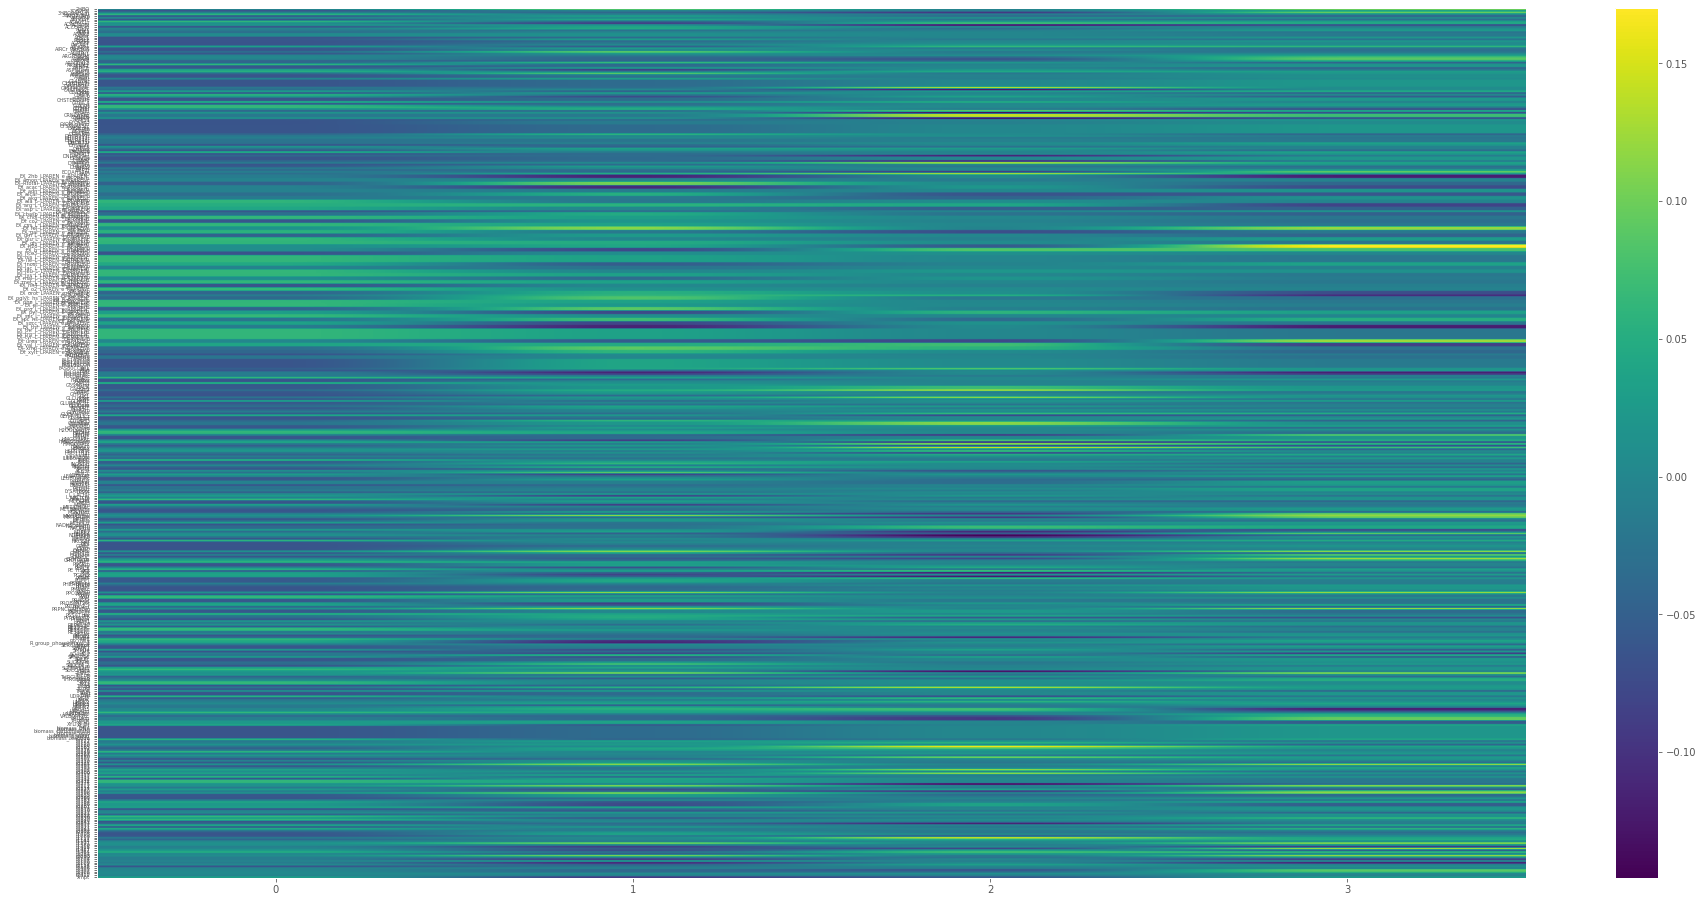

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfA.columns)), dfA.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=5)
plt.colorbar();

In [52]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
#componentes = pcaT.components_
#plt.imshow(componentes.T, cmap='viridis', aspect='auto')
#plt.yticks(range(len(dfAT.columns)), dfAT.columns)
#plt.xticks(np.arange(pcaT.n_components_) , np.arange(pcaT.n_components_) )
#plt.grid(False)
#ax.tick_params(axis='y',labelsize=15)
#plt.colorbar();

In [53]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.49233371 0.06306258 0.05605925 0.04079737]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.49233371 0.55539629 0.61145554 0.65225291]


In [54]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pcaT.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pcaT.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.94803611 0.03275036 0.00411038 0.00341744]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.94803611 0.98078647 0.98489684 0.98831428]


In [55]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.06432289657814233 -0.06429599727178263
0.11460884715935249 -0.11531786154146315
0.16304663895043892 -0.14571104750411007
0.17013927500642567 -0.12372570118976993


In [56]:
nums_a = {}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.063:
        print(i, p)
        nums_a[i]=1

#print('------------------------------')
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)>0.10:
        pass
        #print(i, p)
        #nums.append(i)
        
#print('------------------------------')
        
for i,p in enumerate(pca.components_[2]):
    if abs(p)>0.095:
        pass
        #print(i, p)
        #nums.append(i)
        
#print('------------------------------')
        
for i,p in enumerate(pca.components_[3]):
    if abs(p)>0.12:
        pass
        #print(i, p)
       # nums.append(i)
    


3 0.06432289657814233
19 -0.06361829477088062
37 -0.06405547986887156
38 -0.06317697269507154
63 -0.06420519423661379
64 -0.0642051942366139
128 0.06328311663102741
129 0.06328311663102738
136 -0.06429599727178263
137 -0.06429599727178262
146 0.06364819713247813
147 0.06364819713247813
154 -0.06375854803988994
155 -0.06375854803988994
156 0.06427788846436833
157 0.06427788846436833
165 0.06373771920662454
166 0.06373771920662454
171 0.06404889115555212
172 0.06404889115555212
193 -0.0639875626228492
208 -0.06404015444453524
209 0.06384523743540953
220 -0.06329945186897348
228 -0.06361829477088066
274 0.06380872735928773
276 -0.06389395542706118
288 -0.06328681885065111
299 -0.06427788846436833
301 -0.06420519423661376
302 -0.06413297591876267
346 0.06327053085439989
347 0.06306081136633024
367 -0.06399026825593503
369 0.06302601251589539
451 0.06424748055566941
479 -0.06373771920662454


In [57]:
a_var={}
for i,r in enumerate(dfA.columns):
    if i in nums_a:
        print(r, end='  ')
        a_var[r]=1

3HCO3_NAt  AGPAT1  ATPS4m  ATPtm  CYOOm3  CYOR_u10m  EX_glu_L_LPAREN_e_RPAREN_  EX_glu_L_b  EX_hco3_LPAREN_e_RPAREN_  EX_hco3_b  EX_leu_L_LPAREN_e_RPAREN_  EX_leu_L_b  EX_nh4_LPAREN_e_RPAREN_  EX_nh4_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_pi_LPAREN_e_RPAREN_  EX_pi_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  FADH2ETC  FUMm  G3PD1  GLUB0AT3tc  GPAM_hs  MALtm  MDH  NADH2_u10m  O2t  O2tm  OAADC  RE3273C  RE3301C  SUCD1m  SUCOASm  r0838  r2136  

In [58]:
mi=1000
for i in abs(pca.components_[0]):
    if i!=0 and i<mi:
        mi = i
        
print(mi)

mi2=1000
for i in abs(pca.components_[1]):
    if i!=0 and i<mi2:
        mi2 = i
        
print(mi2)

mi3=1000
for i in abs(pca.components_[2]):
    if i!=0 and i<mi3:
        mi3 = i
        
print(mi3)

mi4=1000
for i in abs(pca.components_[3]):
    if i!=0 and i<mi4:
        mi4 = i
        
print(mi4)

0.0007319830918595449
0.00022459465800014553
7.447540285240167e-05
0.00027989736519032317


In [59]:
numss_a = {}
ex = 10
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_a[i]=1

#print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)<(mi2*(ex)):
        pass
        #print(i, p)
        #numss[i]=1
        
#print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[2]):
    if abs(p)<(mi3*(ex/1000)):
        pass
        #print(i, p)
        #nums[i]=1
        
#print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[3]):
    if abs(p)<(mi4*(ex/10000)):
        pass
        #print(i, p)
        #nums[i]=1

5 0.004652147266042994
11 -0.004018190862510811
14 0.006404123394559034
15 0.006404123394559084
26 -0.00405259140111549
27 0.0016397535884408957
28 -0.0021040861750284776
39 -0.004344154225475799
95 -0.004652147266043026
96 -0.004652147266043024
99 -0.006715585014161919
100 -0.006715585014161923
101 -0.006404123394559041
102 -0.006404123394559043
144 -0.005967183913426256
145 -0.005967183913426247
185 -0.0007698301810230724
186 -0.0007698301810230724
255 0.0007319830918595449
261 0.0013349347964388932
264 -0.005428446699316652
265 -0.005428446699316652
271 0.005967183913426254
293 0.006003945792408491
307 -0.0007698301810230724
312 -0.0029221131172002153
349 0.001235750807830462
375 0.005319405276568672
388 0.004760608158750322
391 0.0007698301810230724
392 0.0021040861750284776
394 -0.0038376650621375456
420 -0.006114380827802519
448 -0.004905065544332574
449 0.003796691705420555
465 0.0007319830918595487
469 -0.0007698301810230724
472 0.001856844601897083
476 -0.004344154225475795
47

In [60]:
a_nvar={}
for i,r in enumerate(dfA.columns):
    if i in numss_a:
        print(r, end='  ')
        a_nvar[r]=1

4MOPte  ACt2r  ADNK3  ADNt  ARGATB0tc  ARGN  ARGNm  BHBt  EX_4mop_LPAREN_e_RPAREN_  EX_4mop_b  EX_acac_LPAREN_e_RPAREN_  EX_acac_b  EX_adn_LPAREN_e_RPAREN_  EX_adn_b  EX_lac_L_LPAREN_e_RPAREN_  EX_lac_L_b  EX_urea_LPAREN_e_RPAREN_  EX_urea_b  INSTt2r  LEUATB0tc  LEUTAm  LEUt5m  L_LACt4r  NDPK4  ORNTArm  PEPCK  RETNt  THRt4  UMPK3  UREAt5  UREAtm  VALATB0tc  r0330  r0819  r0821  r1144  r1427  r2084  r2108  r2114  r2406  r2407  r2408  r2410  r2411  

In [61]:
#Intersect between var and non-var reac
for i in a_nvar.keys():
    if i in a_var:
        print(i)

In [223]:
#PCA for B

In [62]:
scaler = StandardScaler()
scaler.fit(dfB)
pcaB = scaler.transform(dfB)

pca = PCA(n_components=4) # estimate only 2 PCs
pcaB_new = pca.fit_transform(pcaB)

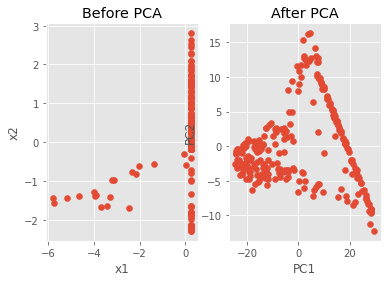

In [64]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaB[:,146], pcaB[:,160])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaB_new[:,0], pcaB_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()


In [65]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfB.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,3DSPHR,3HCO3_NAt,4MOPt2im,4MOPte,AACOAT,ACACT1r,ACACtx,ACCOACm,ACt2m,ACt2r,...,r2101,r2104,r2105,r2114,r2136,r2400,r2404,r2405,r2408,xmpt
PC1,-0.059998,0.061515,0.013879,0.013879,-0.056855,0.056855,0.058566,-0.058077,-0.004789,-0.004778,...,-0.001561,-0.006624,-0.006001,0.001599,-0.061135,0.009747,0.009747,0.004325,0.004325,0.025525
PC2,0.033846,0.009055,-0.038749,-0.038749,-0.063554,0.063554,0.044230,-0.057173,-0.064456,-0.071592,...,-0.028974,0.035019,0.030508,0.069387,0.025688,0.035385,0.035385,-0.006279,-0.006279,0.070224
PC3,0.000899,-0.016984,0.018858,0.018858,-0.002851,0.002851,0.002956,-0.002919,-0.010290,-0.009616,...,-0.011724,-0.001491,0.002034,-0.003369,-0.005680,0.001143,0.001143,0.004721,0.004721,0.027639
PC4,0.015381,0.011449,-0.044028,-0.044028,0.003966,-0.003966,0.019156,-0.004427,0.008220,0.007321,...,0.009057,-0.004296,-0.030439,0.005086,0.004246,0.004324,0.004324,0.002933,0.002933,-0.032707


In [66]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.57534884 0.07467698 0.03490566 0.02581062]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.57534884 0.65002582 0.68493148 0.71074209]


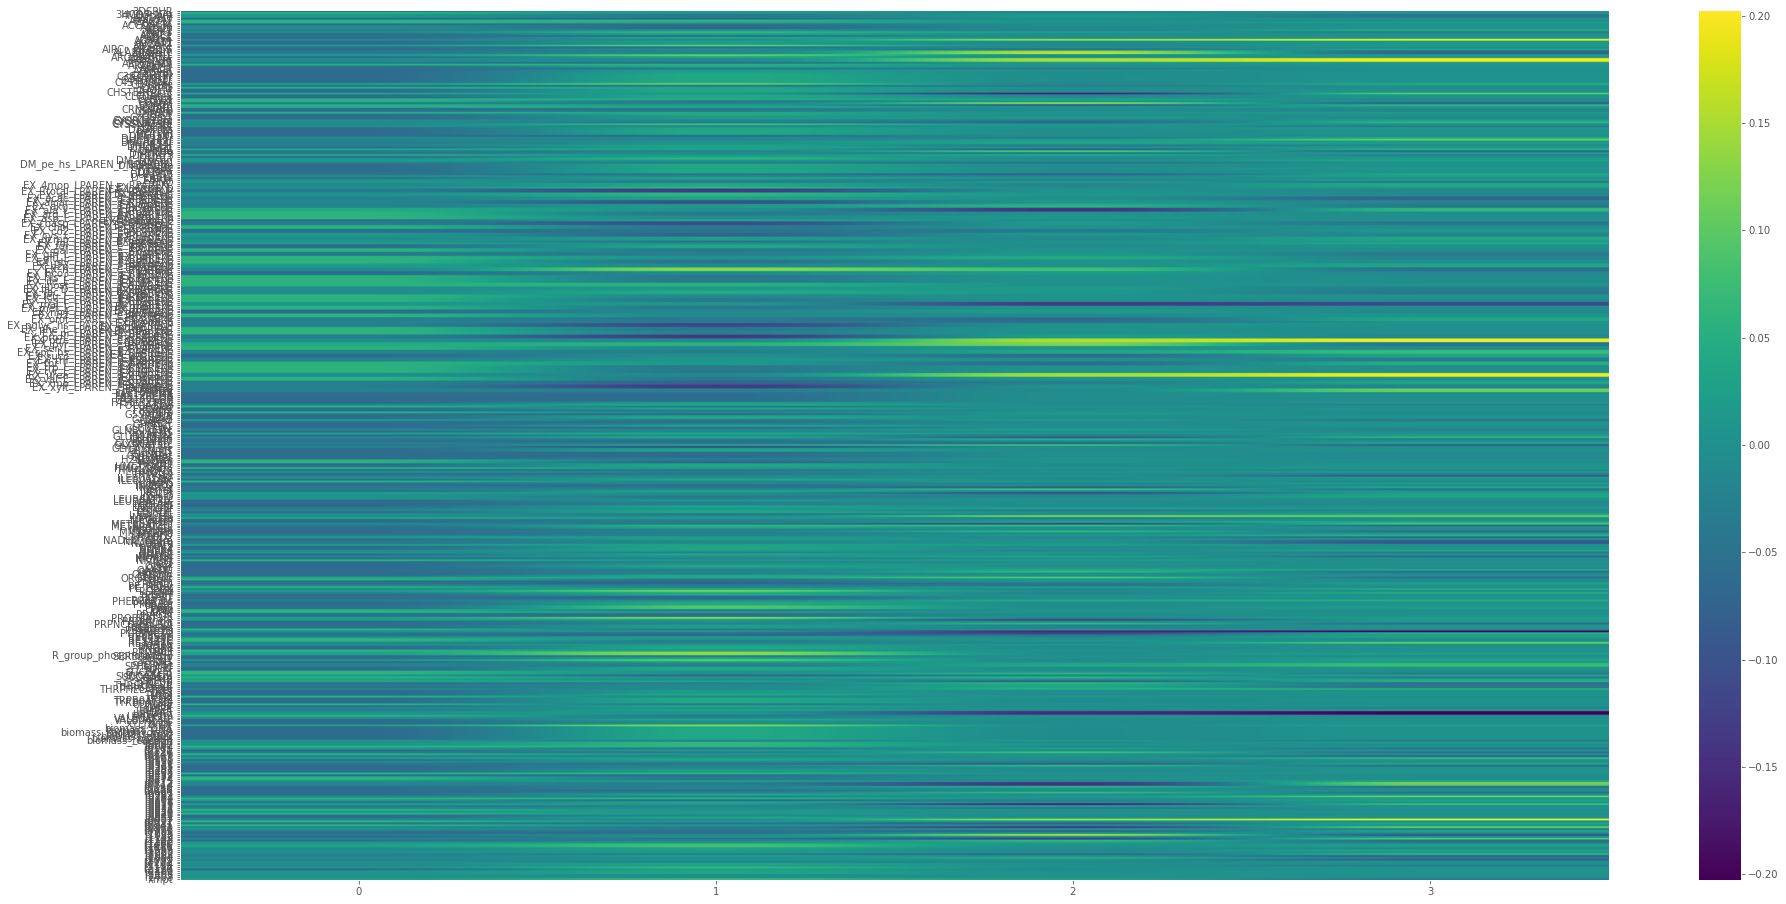

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfB.columns)), dfB.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=10)
plt.colorbar();


In [68]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.06172103840871804 -0.06172103840871804
0.14290383533138887 -0.13787825423161168
0.17463209017074074 -0.17420540943988802
0.20259860605441138 -0.20259860605441138


In [69]:
nums_b={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.061:
        print(i, p)
        nums_b[i]=1

#print('------------------------------')
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)>0.10:
        pass
        #print(i, p)
        #nums.append(i)
        
#print('------------------------------')
        
for i,p in enumerate(pca.components_[2]):
    if abs(p)>0.095:
        pass
        #print(i, p)
        #nums.append(i)
        
#print('------------------------------')
        
for i,p in enumerate(pca.components_[3]):
    if abs(p)>0.18:
        pass
        #print(i, p)
        #nums.append(i)

1 0.06151537864192003
31 -0.061443675642726465
55 -0.06152641274562085
56 -0.06152641274562085
107 0.06155218065979688
108 0.06155218065979688
136 -0.06151537864192013
137 -0.06151537864192013
148 0.061589156089546376
149 0.061589156089546376
156 -0.06137731309305824
157 -0.06137731309305824
158 0.06172103840871804
159 0.06172103840871804
167 0.06113477025005869
168 0.06113477025005869
175 0.06149204223929285
176 0.06149204223929285
204 -0.061271402469366465
209 0.061255651398116846
255 -0.06158443651396207
275 -0.061012354427118595
288 -0.06172103840871804
290 -0.06152641274562085
318 -0.06162761681849646
344 0.06157775245183358
354 -0.061271402469366465
355 -0.06127140246936646
357 0.061234952805590034
370 -0.061124738379683304
371 -0.061124738379683304
385 -0.061271402469366465
395 -0.06127140246936646
396 -0.06127140246936646
416 0.06167187694491075
422 0.061590798425758056
424 0.06153053404990372
430 -0.06155218065979688
447 -0.06113477025005869


In [70]:
b_var={}
for i,r in enumerate(dfB.columns):
    if i in nums_b:
        print(r, end='  ')
        b_var[r]=1

3HCO3_NAt  ATPS4m  CYOOm3  CYOR_u10m  EX_asp_L_LPAREN_e_RPAREN_  EX_asp_L_b  EX_hco3_LPAREN_e_RPAREN_  EX_hco3_b  EX_leu_L_LPAREN_e_RPAREN_  EX_leu_L_b  EX_nh4_LPAREN_e_RPAREN_  EX_nh4_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_pi_LPAREN_e_RPAREN_  EX_pi_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  FBA  G3PD1  LEUB0AT3tc  NADH2_u10m  O2t  O2tm  PROtm  SUCCt2m  TKT1  TKT2  TPI  XYLK  XYLTD_Dr  r0191  r0407  r0408  r0838  r0911  r0941  r1143  r2136  

In [71]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.0012143221228020013
8.452521146287604e-05
6.202073793325434e-05
0.0006604368564583369


In [72]:
numss_b={}
ex = 20
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_b[i]=1

#print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)<(mi2*(ex/500)) and p!=0:
        pass
        #print(i, p)
        #nums[i]=1
        
#print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[2]):
    if abs(p)<(mi3*(ex/1000)) and p!=0:
        pass
        #print(i, p)
        #nums[i]=1
        
#print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[3]):
    if abs(p)<(mi4*(ex/10000)) and p!=0:
        pass
        #print(i, p)
        #nums[i]=1

2 0.013878903137286272
3 0.01387890313728627
8 -0.0047885696081501165
9 -0.004778230657994647
11 -0.0012143221228020013
15 -0.005509534533296103
18 0.013586612832977085
23 0.01945440274985068
25 -0.005509534533296103
26 -0.005509534533296103
57 -0.003583815896919629
58 -0.010311166632686969
59 -0.011251453049120291
60 0.0070502557647778566
66 -0.012460418143303693
67 -0.01643331919894345
70 -0.019058801615437503
77 0.0032584636869469026
78 0.021273393341175676
79 -0.021211411619203008
86 0.0033074771870363023
88 0.001285133574693359
89 0.020030231119300194
90 -0.01387890313728627
91 -0.01387890313728627
92 0.0032584636869469026
95 0.004788569608150116
96 0.004788569608150116
99 -0.013586612832977085
100 -0.013586612832977085
101 -0.02202738032466361
102 -0.02202738032466361
116 0.016183479713246754
117 0.016183479713246754
118 -0.0070502557647778566
119 -0.0070502557647778566
120 0.014461466209624433
121 0.022683057937272984
132 0.022682780306516957
133 0.022682780306516957
134 -0.0125

In [73]:
b_nvar={}
for i,r in enumerate(dfB.columns):
    if i in numss_b:
        print(r, end='  ')
        b_nvar[r]=1

4MOPt2im  4MOPte  ACt2m  ACt2r  ADK3  AGMTm  AICARte  ALAtN1  ARGDCm  ARGtm  CYSB0AT3tc  CYSSNAT4te  CYSSNAT5tc  CYTK4  DHCR241r  DHCR242r  DHCR72r  DM_Lcystin  DM_fol  DM_pe_hs_LPAREN_r_RPAREN_  D_LACt2  EBP2r  ENO  EX_4mop_LPAREN_e_RPAREN_  EX_4mop_b  EX_Lcystin_b  EX_ac_LPAREN_e_RPAREN_  EX_ac_b  EX_aicar_LPAREN_e_RPAREN_  EX_aicar_b  EX_akg_LPAREN_e_RPAREN_  EX_akg_b  EX_cys_L_LPAREN_e_RPAREN_  EX_cys_L_b  EX_dcmp_LPAREN_e_RPAREN_  EX_dcmp_b  EX_fol_LPAREN_e_RPAREN_  EX_fol_b  EX_h2o_LPAREN_e_RPAREN_  EX_h2o_b  EX_h_LPAREN_e_RPAREN_  EX_h_b  EX_lac_D_LPAREN_e_RPAREN_  EX_lac_D_b  EX_lac_L_LPAREN_e_RPAREN_  EX_lac_L_b  EX_mal_L_LPAREN_e_RPAREN_  EX_mal_L_b  EX_pe_hs_b  EX_pglyc_hs_LPAREN_e_RPAREN_  EX_pglyc_hs_b  EX_ptrc_LPAREN_e_RPAREN_  EX_ptrc_b  EX_spc_hs_LPAREN_e_RPAREN_  EX_spc_hs_b  EX_thf_LPAREN_e_RPAREN_  EX_thf_b  EX_urea_LPAREN_e_RPAREN_  EX_urea_b  FADH2tru  FADtru  FOLOAT1tc  GAPD  GLNB0AT3tc  GLUDxm  GLYt7_311_r  HMGLm  ILEB0AT2tc  LDH_D  LDH_L  LEUB0AT2tc  LSTO2r  L_L

In [74]:
#Intersect between var and non-var reac
for i in b_nvar.keys():
    if i in b_var:
        print(i)

In [75]:
#PCA for C

In [76]:
scaler = StandardScaler()
scaler.fit(dfC)
pcaC = scaler.transform(dfC)

pca = PCA(n_components=4) # estimate only 2 PCs
pcaC_new = pca.fit_transform(pcaC)

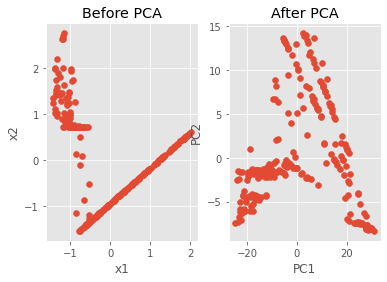

In [77]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcaC[:,123], pcaC[:,131])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcaC_new[:,0], pcaC_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [78]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfC.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,2HBO,3DSPHR,3HBCOAHLm,3HCO3_NAt,3MOBt2im,3MOPt2im,AACOAT,ACACT10m,ACACT1r,ACACt2,...,r2079,r2086,r2097,r2109,r2136,r2471,r2473,r2521,r2526,r2534
PC1,0.016008,-0.062375,0.013742,0.061373,0.013787,0.009402,-0.061510,0.015742,0.061510,0.032852,...,-0.015496,-0.006620,-0.019784,-0.014527,-0.062375,0.007570,-0.009021,0.009021,-0.062373,-0.062382
PC2,0.035799,0.006917,0.096523,0.023989,0.088246,0.072941,-0.008587,0.149921,0.008587,0.088715,...,-0.034365,-0.015266,-0.032105,-0.032318,0.006917,-0.015127,-0.008503,0.008503,0.006966,0.006183
PC3,-0.123396,-0.002229,0.104741,0.002312,0.092384,0.076407,0.004734,0.039259,-0.004734,0.078930,...,0.121942,0.062230,0.085488,0.107874,-0.002229,0.003043,-0.021040,0.021040,-0.002238,0.000196
PC4,0.062048,0.000191,0.163399,0.013918,0.134636,0.094412,0.032546,-0.067902,-0.032546,0.076641,...,-0.061932,-0.032562,-0.031925,-0.053777,0.000191,-0.005375,0.001377,-0.001377,0.000209,-0.001024


In [79]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.64898589 0.08740676 0.04543102 0.03444918]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.64898589 0.73639265 0.78182367 0.81627285]


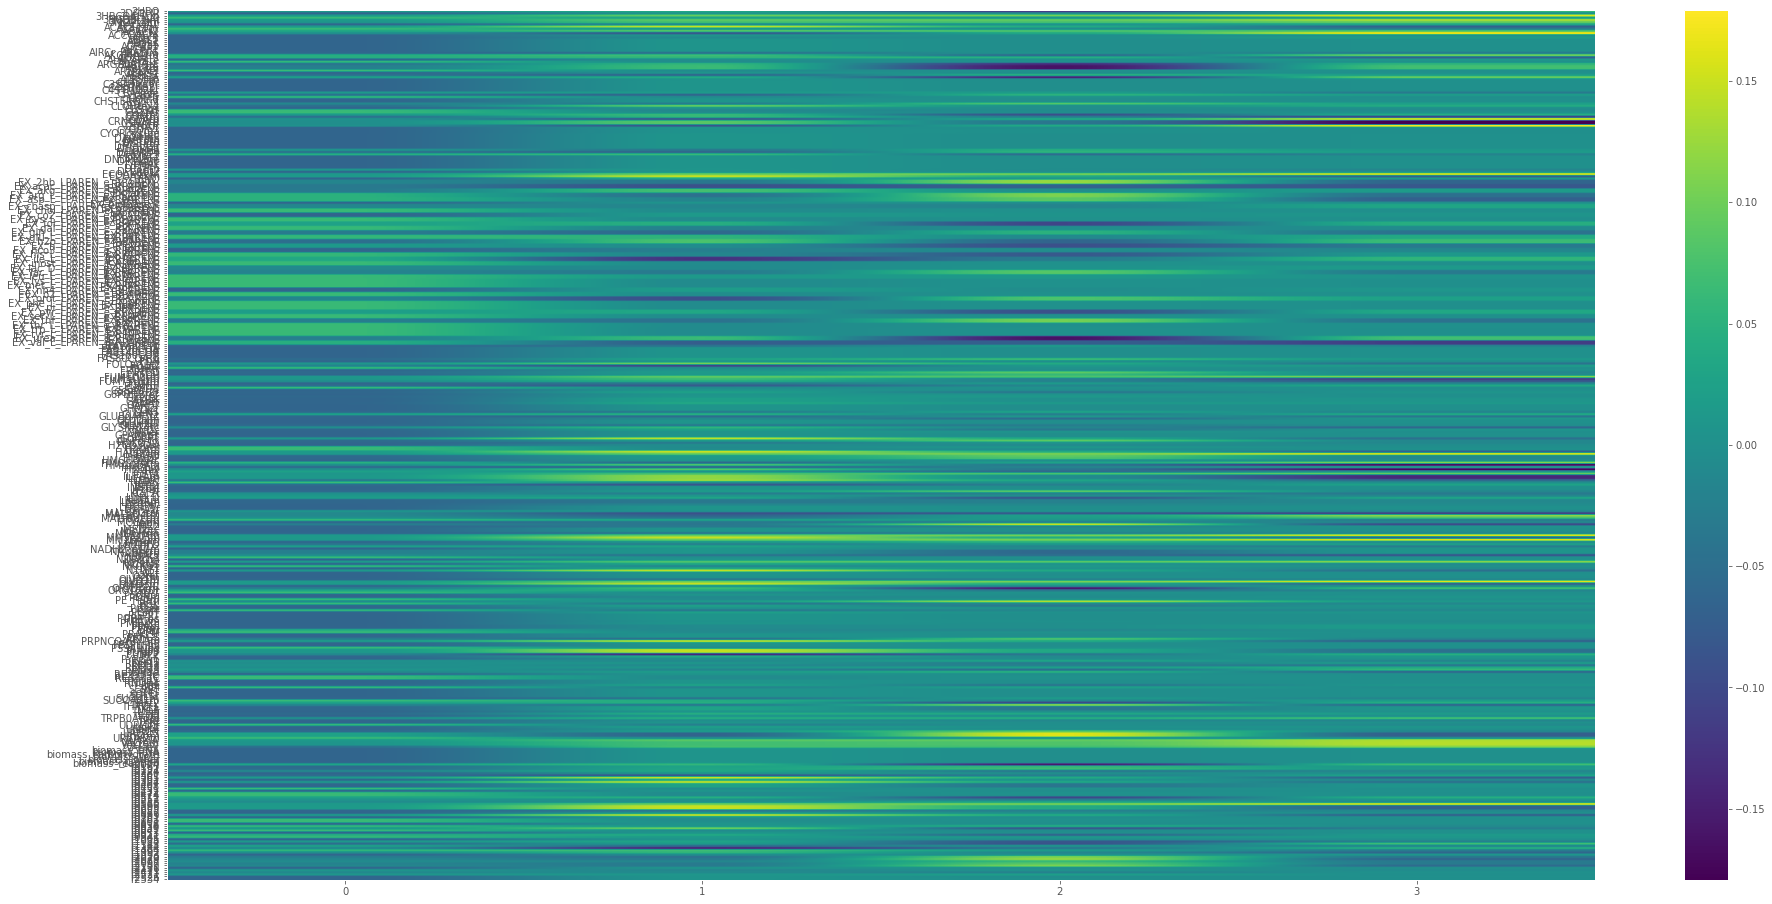

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfC.columns)), dfC.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=10)
plt.colorbar();

In [81]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.06241931152682765 -0.062409333966595926
0.14992073026875238 -0.14678938435135094
0.16203402491838517 -0.16203402491838517
0.17930744296008816 -0.17930744296008816


In [82]:
nums_c={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.0623212723578404:
        print(i, p)
        nums_c[i]=1

#print('------------------------------')
        

1 -0.06237463703909374
11 -0.06237463703909363
13 -0.06237463703909362
14 -0.0623746370390936
15 -0.06237463703909362
16 -0.06237463703909362
17 -0.0623746370390936
18 -0.0623746370390936
23 0.06237463703909363
27 0.06237463703909362
28 -0.062374637039093614
31 -0.062396104783552286
32 -0.06237463703909363
33 -0.06237463703909363
34 -0.06237463703909363
35 -0.06237463703909363
36 -0.06237463703909363
39 0.06237463703909362
40 -0.06237463703909362
41 -0.06237463703909363
44 -0.06237463703909362
53 -0.06237463703909363
54 -0.06240895492683709
55 -0.06240895492683709
56 -0.062374637039093614
57 -0.06237463703909363
58 -0.06237463703909362
59 -0.06237463703909362
60 -0.06237463703909363
61 -0.06237463703909363
62 -0.06237463703909363
66 -0.06237463703909362
67 -0.062374637039093614
68 -0.06237463703909362
69 -0.06237463703909363
70 -0.062374637039093614
71 -0.062374637039093614
73 -0.06237463703909363
87 -0.06237463703909362
90 0.06237463703909362
91 0.06237463703909362
94 0.06237463703909

In [83]:
c_var={}
for i,r in enumerate(dfC.columns):
    if i in nums_c:
        print(r,end='  ')
        c_var[r]=1

3DSPHR  ACCOACm  ADSL1  ADSL2  ADSS  AGPAT1  AICART  AIRCr_PRASCS  ALATA_L  ARTPLM3  ASNS1  ATPS4m  C14STRr  C3STDH1Pr  C3STKR2r  C4STMO1r  C4STMO2Pr  CDIPTr  CHOLtu  CHSTEROLtrc  CLS_hs  CTPS1  CYOOm3  CYOR_u10m  CYStec  DAGK_hs  DATPtn  DCTPtn  DGTPtn  DHCR72r  DHCRD1  DMATT  DNDPt19m  DPMVDc  DSAT  DTMPK  DTTPtn  EBP1r  EX_biomass_c  EX_chol_LPAREN_e_RPAREN_  EX_chol_b  EX_cys_L_LPAREN_e_RPAREN_  EX_cys_L_b  EX_inost_LPAREN_e_RPAREN_  EX_inost_b  EX_lys_L_LPAREN_e_RPAREN_  EX_lys_L_b  EX_met_L_LPAREN_e_RPAREN_  EX_met_L_b  EX_o2_LPAREN_e_RPAREN_  EX_o2_b  EX_phe_L_LPAREN_e_RPAREN_  EX_phe_L_b  EX_pi_LPAREN_e_RPAREN_  EX_pi_b  EX_ser_L_LPAREN_e_RPAREN_  EX_ser_L_b  EX_thr_L_LPAREN_e_RPAREN_  EX_thr_L_b  EX_trp_L_LPAREN_e_RPAREN_  EX_trp_L_b  EX_tyr_L_LPAREN_e_RPAREN_  EX_tyr_L_b  FAS100COA  FAS120COA  FAS140COA  FAS160COA  FAS80COA_L  FDH  FORtr  FRDPtcr  G3PD1  G5SADrm  GARFT  GHMT2r  GK1  GLUDym  GLUPRT  GPAM_hs  GRTT  H2Otm  HMGCOARc  IMPC  INSTt4  IPDDI  LNSTLSr  LSTO2r  METtec  

In [84]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.0005918139144242315
0.0008931226886274605
0.00016465372142923548
0.00019061107526488448


In [85]:
numss_c = {}
ex = 20
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_c[i]=1

5 0.009401963805335905
10 0.002212893728642208
49 0.002212893728642208
50 -0.0022128937286422104
51 -0.0022128937286422104
52 0.002212893728642208
63 0.009984895151928701
72 0.011023030964133929
116 -0.011023030964133929
117 -0.011023030964133929
160 0.008322903814641253
166 0.011203705277589515
167 0.010103849542200827
168 -0.001456885640241395
189 -0.003485366037813257
194 0.010958950703728425
206 -0.002212893728642208
208 -0.002212893728642208
210 0.009401963805335907
211 0.01140631020711382
212 0.01140631020711382
219 -0.0005918139144242315
220 0.011023030964133929
227 0.005842293478111515
228 -0.011203705277589515
229 -0.010103849542200827
230 0.001456885640241395
247 -0.001681806016883697
254 0.010958950703728425
268 -0.007567071036474046
290 0.010958950703728425
291 0.010958950703728425
292 -0.010958950703728425
295 0.002552054276751593
296 -0.002552054276751594
297 0.0029551227559543487
298 -0.0029551227559543487
299 0.010280465725406427
300 -0.010280465725406427
321 0.00146523

In [86]:
c_nvar={}
for i,r in enumerate(dfC.columns):
    if i in numss_c:
        print(r)
        c_nvar[r]=1

3MOPt2im
ACACtx
COAtp
CRNCARtp
CSNATp
CSNATr
DHFR
D_LACt2
EX_lac_D_LPAREN_e_RPAREN_
EX_lac_D_b
FOLOAT1tc
FUMSO3tm
FUMSO4tm
FUMTSULtm
GLYSNAT5tc
GUAPRT
HMGCOAtx
HMGLx
ILETA
ILETAm
ILEt5m
KCC2t
LDH_D
L_LACt2r
MALSO3tm
MALSO4tm
MALTSULtm
NAt5
NTD11
PGI
PUNP3
PUNP5
PUNP7
RDH1
RDH1a
RDH2
RDH2a
RDH3
RDH3a
TRPB0AT3tc
VALTAm
VALt5m
r0394
r0552
r0553
r0839
r1384
r1992
r2086
r2471
r2473
r2521


In [87]:
#Intersect between var and non-var reac
for i in c_nvar.keys():
    if i in c_var:
        print(i)

In [88]:
#PCA medium

In [89]:
scaler = StandardScaler()
scaler.fit(dfm)
pcam = scaler.transform(dfm)

pca = PCA(n_components=4) # estimate only 2 PCs
pcam_new = pca.fit_transform(pcam)

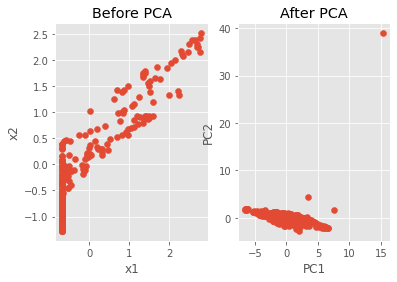

In [90]:
# O2 vs pyr exchange
fig, axes = plt.subplots(1,2)
axes[0].scatter(pcam[:,12], pcam[:,13])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

#PC1 vs PC2
axes[1].scatter(pcam_new[:,0], pcam_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [91]:
pd.DataFrame(
    data    = pca.components_,
    columns = dfm.columns,
    index   = ['PC1', 'PC2','PC3', 'PC4']
)

,EX_Lcystin_m,EX_ac_m,EX_adn_m,EX_ala_L_m,EX_arg_L_m,EX_asp_L_m,EX_chol_m,EX_co2_m,EX_cys_L_m,EX_dcmp_m,...,EX_ptrc_m,EX_pyr_m,EX_ser_L_m,EX_spc_hs_m,EX_succ_m,EX_thr_L_m,EX_trp_L_m,EX_tyr_L_m,EX_urea_m,EX_val_L_m
PC1,0.016895,0.025424,-0.019344,-0.233088,0.065172,-0.188610,0.093609,-0.048861,-0.015025,0.038097,...,0.066145,-0.120662,0.254593,0.007582,0.245761,-0.257425,0.093627,0.093627,-0.062031,-0.102569
PC2,-0.044394,-0.040753,-0.001419,0.097068,-0.035523,0.012460,0.342558,0.104079,0.051192,-0.015330,...,0.105371,-0.068897,-0.085346,-0.017081,0.002650,0.030823,0.342506,0.342506,0.047535,0.056901
PC3,0.123287,0.131586,0.050060,-0.040099,0.186041,0.214111,0.101835,-0.381537,-0.121205,-0.002370,...,0.045010,0.291309,0.158429,0.065144,-0.236114,0.140113,0.102004,0.102004,-0.182839,-0.098640
PC4,0.355836,-0.056231,-0.026925,0.244341,-0.375676,-0.039905,0.014060,0.015391,-0.355407,0.111946,...,-0.107531,-0.243471,0.129807,0.003148,0.014369,0.178168,0.014068,0.014068,0.376884,-0.293870


In [92]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('\n')

prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.2922927  0.19368574 0.15763989 0.06494559]


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.2922927  0.48597844 0.64361833 0.70856392]


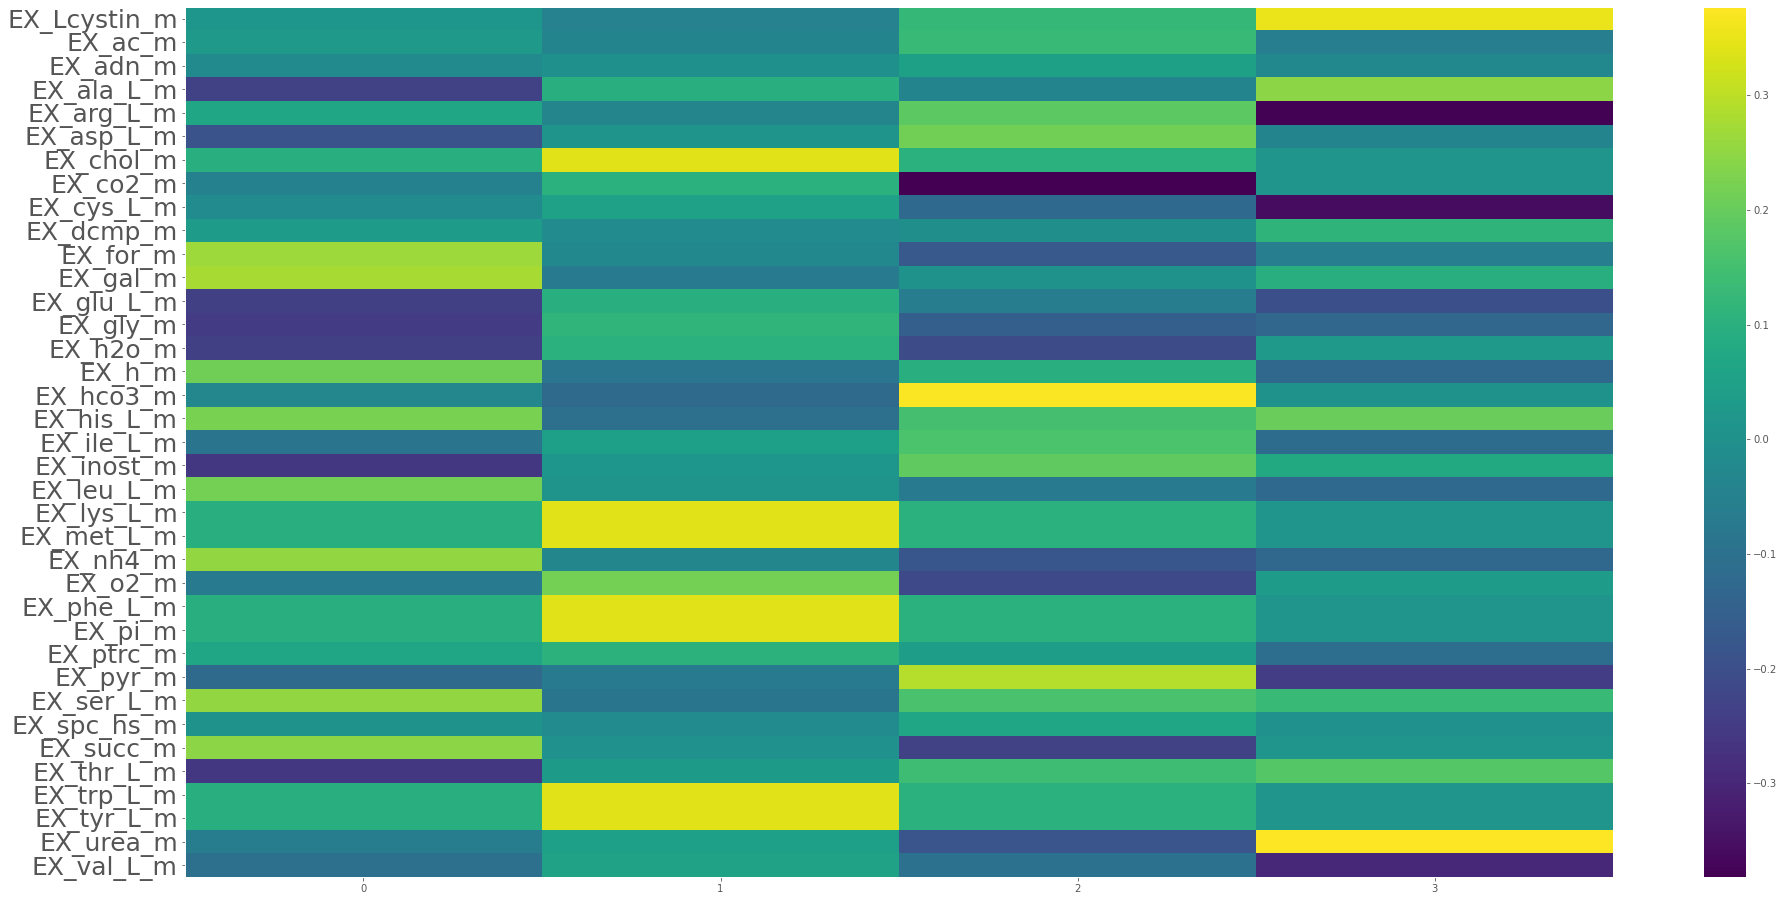

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 16))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(dfm.columns)), dfm.columns)
plt.xticks(np.arange(pca.n_components_) , np.arange(pca.n_components_) )
plt.grid(False)
ax.tick_params(axis='y',labelsize=25)
plt.colorbar();

In [94]:
print(max(pca.components_[0]),min(pca.components_[0]))

print(max(pca.components_[1]),min(pca.components_[1]))

print(max(pca.components_[2]),min(pca.components_[2]))

print(max(pca.components_[3]),min(pca.components_[3]))

0.2783294783714293 -0.25954183357650845
0.3425578008614822 -0.12058338297208578
0.3717001952721275 -0.3815365576405805
0.376883829505074 -0.3756761047977101


In [95]:
nums_m={}
for i,p in enumerate(pca.components_[0]):
    if abs(p)>0.25:
        print(i, p)
        nums_m[i]=1
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)>0.33:
        print(i, i, p)
        nums_m[i]=1

10 0.26721720162653617
11 0.2783294783714293
19 -0.25954183357650845
23 0.2547027970753414
29 0.254593099465765
32 -0.25742474169897117
6 6 0.3425578008614822
21 21 0.34250621891461763
22 22 0.34250621891461797
25 25 0.3425062189146177
26 26 0.34251351177010303
33 33 0.3425062189146181
34 34 0.34250621891461763


In [96]:
m_var={}
for i,r in enumerate(dfm.columns):
    if i in nums_m:
        print(r)
        m_var[r]=1

EX_chol_m
EX_for_m
EX_gal_m
EX_inost_m
EX_lys_L_m
EX_met_L_m
EX_nh4_m
EX_phe_L_m
EX_pi_m
EX_ser_L_m
EX_thr_L_m
EX_trp_L_m
EX_tyr_L_m


In [97]:
mi=min(abs(pca.components_[0]))
print(mi)

mi2=min(abs(pca.components_[1]))
print(mi2)

mi3=min(abs(pca.components_[2]))
print(mi3)

mi4=min(abs(pca.components_[3]))
print(mi4)

0.007581686876365349
0.0014191163153867148
0.0023704664220230084
0.0031479503671268828


In [101]:
numss_m={}
ex = 5
for i,p in enumerate(pca.components_[0]):
    if abs(p)<(mi*ex):
        print(i, p)
        numss_m[i]=1

print('------------------------------------------------')
        
for i,p in enumerate(pca.components_[1]):
    if abs(p)<(mi2*ex*5) and p!=0:
        print(i, p)
        numss_m[i]=1
        

0 0.016895089775018673
1 0.025423951589844035
2 -0.01934363060960914
8 -0.015024630089215132
16 -0.03047437907198064
30 0.007581686876365349
------------------------------------------------
2 -0.0014191163153867148
5 0.012460055462672433
9 -0.015329802718976436
10 -0.028397167092926612
19 0.016797239878539438
20 0.010720847098294864
23 -0.032211750508596315
30 -0.01708085203277942
31 0.002649928387038921
32 0.03082297960245031


In [102]:
m_nvar={}
for i,r in enumerate(dfm.columns):
    if i in numss_m:
        print(r)
        m_nvar[r]=1

EX_Lcystin_m
EX_ac_m
EX_adn_m
EX_asp_L_m
EX_cys_L_m
EX_dcmp_m
EX_for_m
EX_hco3_m
EX_inost_m
EX_leu_L_m
EX_nh4_m
EX_spc_hs_m
EX_succ_m
EX_thr_L_m


In [103]:
#Intersect between var and non-var reac
for i in m_nvar.keys():
    if i in m_var:
        print(i)

EX_for_m
EX_inost_m
EX_nh4_m
EX_thr_L_m


In [104]:
#Shared between populations

In [105]:
all_var={}
for r in a_var.keys():
    if r in b_var or r in c_var:
        all_var[r]=1
        
for r in b_var.keys():
    if r in a_var or r in c_var:
        all_var[r]=1
        
for r in c_var.keys():
    if r in b_var or r in a_var:
        all_var[r]=1
        
all_var

{'3HCO3_NAt': 1,
 'AGPAT1': 1,
 'ATPS4m': 1,
 'CYOOm3': 1,
 'CYOR_u10m': 1,
 'EX_hco3_LPAREN_e_RPAREN_': 1,
 'EX_hco3_b': 1,
 'EX_leu_L_LPAREN_e_RPAREN_': 1,
 'EX_leu_L_b': 1,
 'EX_nh4_LPAREN_e_RPAREN_': 1,
 'EX_nh4_b': 1,
 'EX_o2_LPAREN_e_RPAREN_': 1,
 'EX_o2_b': 1,
 'EX_pi_LPAREN_e_RPAREN_': 1,
 'EX_pi_b': 1,
 'EX_ser_L_LPAREN_e_RPAREN_': 1,
 'EX_ser_L_b': 1,
 'G3PD1': 1,
 'GPAM_hs': 1,
 'NADH2_u10m': 1,
 'O2t': 1,
 'O2tm': 1,
 'RE3273C': 1,
 'RE3301C': 1,
 'r0838': 1,
 'r2136': 1}

In [106]:
all_nvar={}
for r in a_nvar.keys():
    if r in b_nvar or r in c_nvar:
        all_nvar[r]=1
        
for r in b_nvar.keys():
    if r in a_nvar or r in c_nvar:
        all_nvar[r]=1
        
for r in c_nvar.keys():
    if r in b_nvar or r in a_nvar:
        all_nvar[r]=1
        
all_nvar

{'4MOPte': 1,
 'ACt2r': 1,
 'EX_4mop_LPAREN_e_RPAREN_': 1,
 'EX_4mop_b': 1,
 'EX_lac_L_LPAREN_e_RPAREN_': 1,
 'EX_lac_L_b': 1,
 'EX_urea_LPAREN_e_RPAREN_': 1,
 'EX_urea_b': 1,
 'L_LACt4r': 1,
 'RETNt': 1,
 'UREAt5': 1,
 'UREAtm': 1,
 'r0330': 1,
 'r1144': 1,
 'r2114': 1,
 'r2408': 1,
 'D_LACt2': 1,
 'EX_lac_D_LPAREN_e_RPAREN_': 1,
 'EX_lac_D_b': 1,
 'FOLOAT1tc': 1,
 'LDH_D': 1,
 'r0839': 1}

In [137]:
a_only_var={}
a_only_nvar={}

for r in a_var.keys():
    if r not in b_var and r not in c_var:
        a_only_var[r]=1
print(a_only_var)

for r in a_nvar.keys():
    if r not in b_nvar and r not in c_nvar:
        a_only_nvar[r]=1
a_only_nvar

{'ATPtm': 1, 'EX_glu_L_LPAREN_e_RPAREN_': 1, 'EX_glu_L_b': 1, 'FADH2ETC': 1, 'FUMm': 1, 'GLUB0AT3tc': 1, 'MALtm': 1, 'MDH': 1, 'NADH2_u10m': 1, 'NICRNS': 1, 'NP1': 1, 'OAADC': 1, 'RPE': 1, 'SUCD1m': 1, 'SUCOASm': 1, 'r0249': 1, 'r0391': 1, 'r0840': 1, 'r0841': 1}


{'ARGN': 1,
 'ARGNm': 1,
 'INSTt2r': 1,
 'ORNTArm': 1,
 'VALATB0tc': 1,
 'r0821': 1,
 'r1144': 1,
 'r2084': 1,
 'r2407': 1}

In [138]:
b_only_var={}
b_only_nvar={}

for r in b_var.keys():
    if r not in a_var and r not in c_var:
        b_only_var[r]=1
print(b_only_var)

for r in b_nvar.keys():
    if r not in a_nvar and r not in c_nvar:
        b_only_nvar[r]=1
b_only_nvar

{'EX_asp_L_LPAREN_e_RPAREN_': 1, 'EX_asp_L_b': 1, 'FBA': 1, 'LEUB0AT3tc': 1, 'PROtm': 1, 'SUCCt2m': 1, 'TPI': 1, 'XYLK': 1, 'XYLTD_Dr': 1, 'r0191': 1, 'r0407': 1, 'r0408': 1, 'r0911': 1, 'r0941': 1, 'r1143': 1}


{'ACt2m': 1,
 'ACt2r': 1,
 'AGMTm': 1,
 'ARGDCm': 1,
 'ARGtm': 1,
 'CYSB0AT3tc': 1,
 'DM_Lcystin': 1,
 'D_LACt2': 1,
 'EX_Lcystin_b': 1,
 'EX_ac_LPAREN_e_RPAREN_': 1,
 'EX_ac_b': 1,
 'EX_lac_D_LPAREN_e_RPAREN_': 1,
 'EX_lac_D_b': 1,
 'EX_ptrc_LPAREN_e_RPAREN_': 1,
 'EX_ptrc_b': 1,
 'ILEB0AT2tc': 1,
 'LDH_D': 1,
 'LEUB0AT2tc': 1,
 'PTCRTD': 1,
 'r0027': 1,
 'r0062': 1,
 'r0330': 1,
 'r0907': 1,
 'r2000': 1,
 'r2093': 1,
 'r2101': 1,
 'r2105': 1,
 'r2114': 1,
 'r2405': 1,
 'r2416': 1}

In [139]:
c_only_var={}
c_only_nvar={}

for r in c_var.keys():
    if r not in b_var and r not in a_var:
        c_only_var[r]=1
print(c_only_var)

for r in c_nvar.keys():
    if r not in b_nvar and r not in a_nvar:
        c_only_nvar[r]=1
c_only_nvar

{'ACCOACm': 1, 'ADSL1': 1, 'ADSL2': 1, 'ADSS': 1, 'AICART': 1, 'AIRCr_PRASCS': 1, 'ALATA_L': 1, 'ARTPLM3': 1, 'ASNS1': 1, 'C14STRr': 1, 'C3STDH1Pr': 1, 'C3STKR2r': 1, 'C4STMO1r': 1, 'C4STMO2Pr': 1, 'CDIPTr': 1, 'CHOLtu': 1, 'CHSTEROLtrc': 1, 'CLS_hs': 1, 'CTPS1': 1, 'CYStec': 1, 'DAGK_hs': 1, 'DATPtn': 1, 'DCTPtn': 1, 'DGTPtn': 1, 'DHCR72r': 1, 'DHCRD1': 1, 'DMATT': 1, 'DNDPt19m': 1, 'DPMVDc': 1, 'DSAT': 1, 'DTMPK': 1, 'DTTPtn': 1, 'EX_biomass_c': 1, 'EX_chol_LPAREN_e_RPAREN_': 1, 'EX_chol_b': 1, 'EX_cys_L_LPAREN_e_RPAREN_': 1, 'EX_cys_L_b': 1, 'EX_inost_LPAREN_e_RPAREN_': 1, 'EX_inost_b': 1, 'EX_lys_L_LPAREN_e_RPAREN_': 1, 'EX_lys_L_b': 1, 'EX_met_L_LPAREN_e_RPAREN_': 1, 'EX_met_L_b': 1, 'EX_phe_L_LPAREN_e_RPAREN_': 1, 'EX_phe_L_b': 1, 'EX_thr_L_LPAREN_e_RPAREN_': 1, 'EX_thr_L_b': 1, 'EX_trp_L_LPAREN_e_RPAREN_': 1, 'EX_trp_L_b': 1, 'EX_tyr_L_LPAREN_e_RPAREN_': 1, 'EX_tyr_L_b': 1, 'FAS100COA': 1, 'FAS120COA': 1, 'FAS140COA': 1, 'FAS160COA': 1, 'FAS80COA_L': 1, 'FDH': 1, 'FORtr': 1, 'FR

{'ACACtx': 1,
 'COAtp': 1,
 'CRNCARtp': 1,
 'CSNATp': 1,
 'CSNATr': 1,
 'FUMTSULtm': 1,
 'GALt2_2': 1,
 'GLYSNAT5tc': 1,
 'HMGCOAtx': 1,
 'HMGLx': 1,
 'KCC2t': 1,
 'L_LACt2r': 1,
 'MALTSULtm': 1,
 'NAt5': 1,
 'PGI': 1,
 'RDH1': 1,
 'RDH1a': 1,
 'RDH2': 1,
 'RDH2a': 1,
 'RDH3': 1,
 'RDH3a': 1,
 'TRPB0AT3tc': 1,
 'r1380': 1,
 'r1992': 1,
 'r2086': 1,
 'r2473': 1,
 'r2521': 1}

In [ ]:
#Get media and gcs

In [109]:
results=[]
def media_and_gcs(com, name):
    
    # Get growth rates
    sol = com.cooperative_tradeoff(fraction = 0.5, pfba = True, fluxes = True)
    rates = sol.members["growth_rate"].copy()
    rates["community"] = sol.growth_rate
    rates.name = name

    # Get the minimal medium
    med = minimal_medium(com, 0.95*sol.growth_rate, exports = True)
    med.name = name

    #Get fluxes
    com.medium = med[med > 0]
    fluxes = sol.fluxes
    fluxes["sample"] = name
    results.append({"medium": med, "gcs": rates, "fluxes":fluxes})

In [110]:
gcs = pd.DataFrame()
media = pd.DataFrame()
fluxes = pd.DataFrame()

In [111]:
#media_and_gcs(com_6,'D6')
#media_and_gcs(com_6_2,'D6_2')
for i,c in enumerate(com):
    temp='com_'+str(round(c.abundances['A'],2))+str(round(c.abundances['B'],2))+str(round(c.abundances['C'],2))
    media_and_gcs(c,temp)
    print(i,' - ',temp)

0  -  com_0.180.520.3
1  -  com_0.320.470.21
2  -  com_0.840.080.09
3  -  com_0.240.530.23
4  -  com_0.110.390.5
5  -  com_0.280.360.36
6  -  com_0.190.190.62
7  -  com_0.230.460.31
8  -  com_0.320.080.6
9  -  com_0.250.00.75
10  -  com_0.480.210.31
11  -  com_0.370.530.1
12  -  com_0.530.40.07
13  -  com_0.140.130.73
14  -  com_0.130.680.2
15  -  com_0.380.160.46
16  -  com_0.420.090.49
17  -  com_0.150.470.37
18  -  com_0.660.240.11
19  -  com_0.280.370.35
20  -  com_0.330.340.33
21  -  com_0.140.480.37
22  -  com_0.260.380.36
23  -  com_0.430.050.51
24  -  com_0.340.610.04
25  -  com_0.290.270.45
26  -  com_0.540.320.14
27  -  com_0.620.280.1
28  -  com_0.160.560.28
29  -  com_0.540.090.37
30  -  com_0.170.420.41
31  -  com_0.580.110.31
32  -  com_0.030.430.54
33  -  com_0.280.680.04
34  -  com_0.310.470.22
35  -  com_0.220.570.21
36  -  com_0.340.390.27
37  -  com_0.490.240.27
38  -  com_0.190.350.45
39  -  com_0.160.520.31
40  -  com_0.410.270.32
41  -  com_0.050.230.71
42  -  com

In [112]:
for s in results:
    gcs = gcs.append(s["gcs"])
    media = media.append(s["medium"])
    fluxes = fluxes.append(s["fluxes"])

In [113]:
gcs, media, fluxes

(                         A         B         C  community  medium
 com_0.180.520.3   0.013187  0.036953  0.021254   0.027889     NaN
 com_0.320.470.21  0.024267  0.035704  0.015779   0.027889     NaN
 com_0.840.080.09  0.032612  0.002999  0.003468   0.027889     NaN
 com_0.240.530.23  0.017346  0.037736  0.016356   0.027889     NaN
 com_0.110.390.5   0.007388  0.026413  0.033565   0.027889     NaN
 ...                    ...       ...       ...        ...     ...
 com_0.470.220.32  0.035584  0.016452  0.024376   0.027889     NaN
 com_0.470.360.17  0.034616  0.026308  0.012147   0.027889     NaN
 com_0.480.50.02   0.027915  0.028988  0.002956   0.027883     NaN
 com_0.090.390.52  0.005849  0.025348  0.033637   0.027889     NaN
 com_0.570.270.15  0.037436  0.017866  0.009925   0.027889     NaN
 
 [256 rows x 5 columns],
                   EX_arg_L_m  EX_chol_m  EX_co2_m  EX_cys_L_m  EX_gal_m  \
 com_0.180.520.3     0.009519   0.004556 -0.226122    0.001234     0.111   
 com_0.320.470.21

In [114]:
gcs.to_csv("./data/growth_rates_scan.csv")
media.to_csv("./data/minimal_media_scan.csv")
fluxes.to_csv("./data/minimal_fluxes_scan.csv.gz", compression = "gzip")

In [140]:
#check all reactions that correspond to a certain metabolite

In [141]:
met = '_pyr'
for i in range(len(sol)):
    print('---------------- Community:'+str(i)+' - '+str(met)+'------------------')
    for f in sol[i].fluxes:
        if met in f:
            print(f, sol[i].fluxes[f],end='\n\n')

---------------- Community:0 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.099935
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.099935
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.051723
Name: EX_pyr_m, dtype: float64

---------------- Community:1 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.063201
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.063201
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.029788
Name: EX_pyr_m, dtype: float64

---------------- Community:2 - _pyr------------------
EX_p

---------------- Community:36 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.065137
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.065137
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.025078
Name: EX_pyr_m, dtype: float64

---------------- Community:37 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.0
B         0.0
C         0.0
medium    0.0
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.0
B         0.0
C         0.0
medium    0.0
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.0
B         0.0
C         0.0
medium    0.0
Name: EX_pyr_m, dtype: float64

---------------- Community:38 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B     

---------------- Community:54 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.00000
B        -0.07657
C         0.00000
medium    0.00000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.00000
B        -0.07657
C         0.00000
medium    0.00000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.026008
Name: EX_pyr_m, dtype: float64

---------------- Community:55 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A        -0.005367
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A        -0.005367
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.002359
Name: EX_pyr_m, dtype: float64

---------------- Community:56 - _pyr------------------
EX_pyr_LP

---------------- Community:77 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.001701
B        -0.003456
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.001701
B        -0.003456
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.001886
Name: EX_pyr_m, dtype: float64

---------------- Community:78 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.008932
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.008932
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.004249
Name: EX_pyr_m, dtype: float64

---------------- Community:79 - _pyr------------------
E

---------------- Community:99 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A        -0.003117
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A        -0.003117
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.001324
Name: EX_pyr_m, dtype: float64

---------------- Community:100 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.0
B         0.0
C         0.0
medium    0.0
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.0
B         0.0
C         0.0
medium    0.0
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.0
B         0.0
C         0.0
medium    0.0
Name: EX_pyr_m, dtype: float64

---------------- Community:101 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B   

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.001714
Name: EX_pyr_m, dtype: float64

---------------- Community:121 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.027591
C        -0.016963
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.027591
C        -0.016963
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.020178
Name: EX_pyr_m, dtype: float64

---------------- Community:122 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.087516
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.087516
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.00

---------------- Community:143 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A        -0.012335
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A        -0.012335
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.005586
Name: EX_pyr_m, dtype: float64

---------------- Community:144 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A        -0.007371
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A        -0.007371
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.003351
Name: EX_pyr_m, dtype: float64

---------------- Community:145 - _pyr-----------------

EX_pyr_b compartment
A        -0.025573
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.009927
Name: EX_pyr_m, dtype: float64

---------------- Community:164 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.00000
B        -0.03968
C         0.00000
medium    0.00000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.00000
B        -0.03968
C         0.00000
medium    0.00000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.027614
Name: EX_pyr_m, dtype: float64

---------------- Community:165 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.00000
B        -0.08449
C         0.00000
medium    0.00000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.00000
B        -0.08449
C        

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.023364
Name: EX_pyr_m, dtype: float64

---------------- Community:197 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.012211
C        -0.004999
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.012211
C        -0.004999
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.006072
Name: EX_pyr_m, dtype: float64

---------------- Community:198 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A         0.000000
B        -0.026086
C        -0.014987
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A         0.000000
B        -0.026086
C        -0.014987
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.00

---------------- Community:221 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A        -0.007929
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A        -0.007929
B         0.000000
C         0.000000
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.003059
Name: EX_pyr_m, dtype: float64

---------------- Community:222 - _pyr------------------
EX_pyr_LPAREN_e_RPAREN_ compartment
A        -0.017937
B         0.000000
C        -0.001302
medium    0.000000
Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64

EX_pyr_b compartment
A        -0.017937
B         0.000000
C        -0.001302
medium    0.000000
Name: EX_pyr_b, dtype: float64

EX_pyr_m compartment
A         0.000000
B         0.000000
C         0.000000
medium   -0.004519
Name: EX_pyr_m, dtype: float64

---------------- Community:223 - _pyr-----------------

In [ ]:
#track down all reactions where this metabolite is involved

In [18]:
meta = 'pyr_'
track_sol={}
for i,c in enumerate(sol):
    react_metab=[]
    rm_flux=[]
    for r in com[i].reactions:
        if meta in r.reaction:
            react_metab.append((r.id,r.reaction))

    for r in react_metab:
        if '_m' not in r[0]:
            rm_flux.append((r,c.fluxes[r[0][:-3]]))
            #print(sol1.fluxes[r[0][:-3]],end='\n\n')
        else:
            rm_flux.append((r,c.fluxes[r[0]]))
            #print(sol1.fluxes[r[0]],end='\n\n')
    track_sol['com'+str(i)]=(rm_flux)

In [22]:
mt = 'pyr_'
for t in track_sol:
    print(t)
    print(track_sol[t],end='\n\n\n\n')
    print('--------------------------------------------------------------------------------------------------------------------\n\n')
    

com0
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.056932073643261694 pyr_m'), compartment
A        -0.008074
B        -0.110443
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 'akg_c__A + ala_L_c__A <=> glu_L_c__A + pyr_c__A'), compartment
A         0.000000
B         0.000000
C        -0.036678
medium         NaN
Name: AL

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com1
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8384523874949533 pyr_m'), compartment
A         0.000000
B        -0.018112
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com2
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.5057397708227067 pyr_m'), compartment
A         0.000000
B        -0.044509
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com3
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6429959714698872 pyr_m'), compartment
A         0.000000
B        -0.046318
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com4
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.057526556097103554 pyr_m'), compartment
A        -0.008412
B        -0.105292
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com5
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.24511889120183883 pyr_m'), compartment
A         0.000000
B        -0.007672
C        -0.005568
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com6
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6262062114526 pyr_m'), compartment
A         0.000000
B        -0.036735
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com7
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.4224497866356226 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 'a

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com8
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.4517068977092714 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 'a

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com9
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8348018671266723 pyr_m'), compartment
A         0.000000
B        -0.016331
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com10
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.42261315128742993 pyr_m'), compartment
A         0.000000
B        -0.015431
C        -0.002830
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com11
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6911721344029216 pyr_m'), compartment
A         0.000000
B        -0.038685
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com12
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.12892970655633873 pyr_m'), compartment
A        -0.019554
B        -0.114954
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com13
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9631113932086998 pyr_m'), compartment
A         0.0000
B        -0.0039
C         0.0000
medium       NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('AL

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com14
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.374269037383651 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 'a

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com15
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9888600770724413 pyr_m'), compartment
A         0.000000
B        -0.005922
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com16
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.7047951174851786 pyr_m'), compartment
A         0.000000
B        -0.033924
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com17
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.5582695287719684 pyr_m'), compartment
A         0.000000
B        -0.000005
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com18
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.28307126434927377 pyr_m'), compartment
A         0.000000
B        -0.032755
C        -0.031200
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com19
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9448322718631855 pyr_m'), compartment
A         0.000000
B        -0.005795
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com20
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.1239884203520647 pyr_m'), compartment
A        -0.010255
B        -0.039129
C        -0.011510
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com21
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.7390894941505978 pyr_m'), compartment
A         0.000000
B        -0.003968
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com22
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8278244028982542 pyr_m'), compartment
A         0.000000
B        -0.021219
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com23
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.2434641162570771 pyr_m'), compartment
A         0.000000
B        -0.005470
C        -0.002313
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com24
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6526415209332477 pyr_m'), compartment
A         0.000000
B        -0.006266
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com25
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.17638510328834855 pyr_m'), compartment
A         0.000000
B        -0.123349
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com26
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.04542076402281592 pyr_m'), compartment
A        -0.003073
B        -0.212102
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com27
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.020209367092261843 pyr_m'), compartment
A        -0.000653
B        -0.024878
C        -0.009212
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com28
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8131431869620311 pyr_m'), compartment
A         0.000000
B        -0.032541
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com29
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.5109523790883534 pyr_m'), compartment
A         0.000000
B        -0.044692
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com30
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.049078201683317 pyr_m'), compartment
A        -0.006148
B        -0.054287
C        -0.028483
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com31
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.32575670484662445 pyr_m'), compartment
A         0.000000
B        -0.044290
C        -0.039811
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com32
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.4181555609689398 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', '

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com33
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9056208523222479 pyr_m'), compartment
A         0.000000
B        -0.013276
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com34
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.0008274917855731756 pyr_m'), compartment
A        -0.000122
B        -0.107959
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: floa

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com35
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.010415662728081143 pyr_m'), compartment
A        -0.001114
B        -0.026352
C        -0.010384
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com36
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6075120588428221 pyr_m'), compartment
A         0.000000
B        -0.008435
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com37
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.42932212765446 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 'ak

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com38
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.04219331358663625 pyr_m'), compartment
A        -0.004221
B         0.000000
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com39
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.7925474257664475 pyr_m'), compartment
A         0.000000
B        -0.001708
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com40
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.749708950543898 pyr_m'), compartment
A         0.000000
B        -0.037543
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com41
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.45183646152565715 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com42
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8544739675688193 pyr_m'), compartment
A         0.00000
B        -0.00617
C         0.00000
medium        NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com43
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8170520603505199 pyr_m'), compartment
A         0.000000
B        -0.007582
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com44
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.600291359595703 pyr_m'), compartment
A         0.000000
B        -0.006498
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com45
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6263434039207828 pyr_m'), compartment
A         0.000000
B        -0.024758
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com46
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9268097285939313 pyr_m'), compartment
A         0.000000
B        -0.009196
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com47
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6840033107376491 pyr_m'), compartment
A         0.000000
B        -0.043631
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com48
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.0034872397719003523 pyr_m'), compartment
A        -0.00042
B         0.00000
C         0.00000
medium        NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64)

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com49
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9154464931589807 pyr_m'), compartment
A         0.00000
B        -0.00053
C         0.00000
medium        NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com50
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.11359345530841958 pyr_m'), compartment
A        -0.01051
B        -0.00361
C        -0.00103
medium        NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), 

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com51
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.9667933207772227 pyr_m'), compartment
A         0.000000
B        -0.005587
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com52
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.30219092693196214 pyr_m'), compartment
A         0.000000
B        -0.078764
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com53
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.6450561286201164 pyr_m'), compartment
A         0.000000
B        -0.037811
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com54
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.09394308083633784 pyr_m'), compartment
A        -0.011341
B        -0.029261
C        -0.009875
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com55
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.5094059717069097 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', '

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com56
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.2686965227513993 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', '

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com57
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.43453510505170945 pyr_m'), compartment
A         0.000000
B        -0.029749
C        -0.007232
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com58
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.1214636941360131 pyr_m'), compartment
A         0.000000
B        -0.213421
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com59
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.30831481983421005 pyr_m'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64), (('ALATA_L__A', 

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com60
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.8601249796346743 pyr_m'), compartment
A         0.000000
B        -0.018538
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com61
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.03510499307506498 pyr_m'), compartment
A        -0.004909
B         0.000000
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com62
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.09022556269772179 pyr_m'), compartment
A        -0.014387
B        -0.118280
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float6

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
com63
[(('EX_pyr_b__A', 'pyr_b__A <=> 0.5739130573913058 pyr_m'), compartment
A         0.000000
B        -0.045147
C         0.000000
medium         NaN
Name: EX_pyr_b, dtype: float64), (('2AMACHYD__A', '2amac_c__A + h2o_c__A --> nh4_c__A + pyr_c__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: 2AMACHYD, dtype: float64), (('ACNMLr__A', 'acnam_c__A <=> acmana_c__A + pyr_c__A'), compartment
A         0.0
B         NaN
C         0.0
medium    NaN
Name: ACNMLr, dtype: float64), (('AGTim__A', 'ala_L_m__A + glx_m__A --> gly_m__A + pyr_m__A'), compartment
A         0.0
B         0.0
C         NaN
medium    NaN
Name: AGTim, dtype: float64), (('AGTix__A', 'ala_L_x__A + glx_x__A --> gly_x__A + pyr_x__A'), compartment
A         0.0
B         0.0
C         0.0
medium    NaN
Name: AGTix, dtype: float64

Name: EX_pyr_LPAREN_e_RPAREN_, dtype: float64)]



--------------------------------------------------------------------------------------------------------------------
